In [132]:
o1.set_datasets("mnist", is_one_hot=False).y_train_arr

array([[ 7.],
       [ 1.],
       [ 0.],
       ..., 
       [ 9.],
       [ 1.],
       [ 1.]], dtype=float32)

In [139]:
o1 = op.optimizer(n_batch=1000)
o1 = o1.set_datasets("mnist", is_one_hot=False)
o1.x_train_arr /= 255
#o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=10)
o.set_data(o1.y_train_arr, o1.x_train_arr)
o.set_variables()

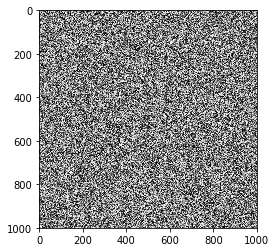

In [8]:
from pylab import *
%matplotlib inline
imshow(img,"gray")

In [3]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(0, 10, 0.1)

ims = []
for a in range(50):
    y = np.sin(x - a)
    im = plt.plot(x, y, "r")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.show()

<IPython.core.display.Javascript object>

In [5]:
import cv2;import numpy as np
import time
for i in range(1000):
    img = np.random.rand(1000,1000) * 255
    cv2.imshow("a",img.astype(np.uint8));cv2.waitKey(10)

In [19]:
cv2.destroyAllWindows()

In [18]:
cv2.imshow("hddedl", img);cv2.waitKey(1)

-1

In [1]:

img = np.array(o.params[0].eval())
s = img.size
img = img.reshape((int(np.sqrt(s)), int(np.sqrt(s))))
img = cv2.resize(img, (100, 100)) * 255 #.astype(np.uint8) * 255
img = img.astype(np.uint8)
cv2.imshow("hdedl", img);cv2.waitKey(1)

NameError: name 'np' is not defined

In [1]:
import Optimizer as op

o1 = op.optimizer(n_batch=100)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=1000)
o.set_data(o1.x_train_arr, o1.x_train_arr, test_size=0)
o.set_variables()
#o = o.reshape((n_batch,1,28,28)).conv2d(kshape=(4,1,24,24)).relu().pool()
o = o.reshape((1, 1, 28*28))
o = o.conv2d((3, 1, 1, 17), mode="valid").relu()
o = o.conv2d((1, 3, 1, 11), mode="valid").relu()
o = o.conv2d((1, 1, 1, 11), mode="valid").relu()
o = o.conv2d((1, 1, 1, 17), mode="valid").relu()
#o = o.conv(1, 17, 17, mode="full")
o = o.flatten().dense(784)
#$o = o.dense(100).dense(10).dense(100).dense(28*28)
#o = o.sigmoid().dense(10).sigmoid().dense(28*28).sigmoid()
o = o.loss_mse()
o = o.softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5110)
/home/yu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


732 784
Epoch. 0: loss = 1.22050970336, acc = 2.3016e-03.
Epoch. 1: loss = 1.22043270309, acc = 2.3016e-03.
Epoch. 2: loss = 1.22043273001, acc = 2.3016e-03.
Epoch. 3: loss = 1.22043272616, acc = 2.3016e-03.
KeyboardInterrupt



In [8]:

[x.n_out for x in o.layerlst]

[(784,),
 (1, 1, 784),
 (3, 1, 784),
 (1, 1, 784),
 (1, 1, 784),
 (1, 1, 784),
 784,
 784]

In [79]:
th.tensor.nnet.conv2d?

In [28]:
import numpy as np
np.arange(3) + np.arange(9).reshape((3,3))

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

In [2]:


import theano as th

In [8]:
lst = []
for p1 in o1.params:
    for p2 in o2.params:
        if p1 is p2:
            lst += [p1]


In [2]:
len(o1.params), len(o2.params)

(6, 6)

In [14]:
import Optimizer as op
o = op.optimizer(n_batch=100)
o = o.set_datasets("iris", is_one_hot=True)
#o.x_train_arr /= 255
#o.set_variables()
o = o.sigmoid().dense(10).sigmoid()

k = op.optimizer(n_batch=100)
k = k.set_datasets("iris")
k.x_train_arr /= 255
k.set_variables()
k = k.dense(10)
#o1 = o.dense(10)
#o2 = o.dense(10)
#o3 = o.dense(10)
#o4 = o.dense(10)
#o5 = o.dense(10).relu()

o = o * k

o = o.softmax().loss_cross_entropy()
o = o.opt_Adam(0.001).compile()
o.optimize(100000, 1)

4 10
4 10
Epoch. 0: loss = 0.57742231422, acc = 0.0000e+00.
Epoch. 1: loss = 0.688609232505, acc = 0.0000e+00.
Epoch. 2: loss = 0.742697219054, acc = 0.0000e+00.
Epoch. 3: loss = 0.800387064616, acc = 0.0000e+00.
Epoch. 4: loss = 0.714698682229, acc = 0.0000e+00.
Epoch. 5: loss = 0.720070219702, acc = 0.0000e+00.
Epoch. 6: loss = 0.664711619417, acc = 0.0000e+00.
Epoch. 7: loss = 0.699860685401, acc = 0.0000e+00.
Epoch. 8: loss = 0.814677692122, acc = 0.0000e+00.
Epoch. 9: loss = 0.679154818257, acc = 0.0000e+00.
Epoch. 10: loss = 0.677232278718, acc = 0.0000e+00.
Epoch. 11: loss = 0.706939482027, acc = 0.0000e+00.
Epoch. 12: loss = 0.736657447285, acc = 0.0000e+00.
Epoch. 13: loss = 0.688744460543, acc = 0.0000e+00.
Epoch. 14: loss = 0.513692986634, acc = 0.0000e+00.
Epoch. 15: loss = 0.634401374393, acc = 0.0000e+00.
Epoch. 16: loss = 0.481763275133, acc = 0.0000e+00.
Epoch. 17: loss = 0.581852388051, acc = 0.0000e+00.
Epoch. 18: loss = 0.693928077817, acc = 0.0000e+00.
Epoch. 19: lo

Epoch. 191: loss = 0.680159860187, acc = 0.0000e+00.
Epoch. 192: loss = 0.595525776347, acc = 0.0000e+00.
Epoch. 193: loss = 0.798186742597, acc = 0.0000e+00.
Epoch. 194: loss = 0.698928783337, acc = 0.0000e+00.
Epoch. 195: loss = 0.661357864738, acc = 0.0000e+00.
Epoch. 196: loss = 0.667404342029, acc = 0.0000e+00.
Epoch. 197: loss = 0.697749356429, acc = 0.0000e+00.
Epoch. 198: loss = 0.756323089202, acc = 0.0000e+00.
Epoch. 199: loss = 0.668389226, acc = 0.0000e+00.
Epoch. 200: loss = 0.60258006884, acc = 0.0000e+00.
Epoch. 201: loss = 0.702783382601, acc = 0.0000e+00.
Epoch. 202: loss = 0.668275356293, acc = 0.0000e+00.
Epoch. 203: loss = 0.695460041364, acc = 0.0000e+00.
Epoch. 204: loss = 0.798741314146, acc = 0.0000e+00.
Epoch. 205: loss = 0.770528366168, acc = 0.0000e+00.
Epoch. 206: loss = 0.70569117864, acc = 0.0000e+00.
Epoch. 207: loss = 0.763185570637, acc = 0.0000e+00.
Epoch. 208: loss = 0.663953978154, acc = 0.0000e+00.
Epoch. 209: loss = 0.732801937395, acc = 0.0000e+00

Epoch. 361: loss = 0.662049195833, acc = 0.0000e+00.
Epoch. 362: loss = 0.557073247102, acc = 0.0000e+00.
Epoch. 363: loss = 0.655557049645, acc = 0.0000e+00.
Epoch. 364: loss = 0.770664629009, acc = 0.0000e+00.
Epoch. 365: loss = 0.628722914391, acc = 0.0000e+00.
Epoch. 366: loss = 0.723238041004, acc = 0.0000e+00.
Epoch. 367: loss = 0.794144057565, acc = 0.0000e+00.
Epoch. 368: loss = 0.722420795096, acc = 0.0000e+00.
Epoch. 369: loss = 0.65456463231, acc = 0.0000e+00.
Epoch. 370: loss = 0.746736758285, acc = 0.0000e+00.
Epoch. 371: loss = 0.664749617378, acc = 0.0000e+00.
Epoch. 372: loss = 0.74977113141, acc = 0.0000e+00.
Epoch. 373: loss = 0.793846117126, acc = 0.0000e+00.
Epoch. 374: loss = 0.627663359046, acc = 0.0000e+00.
Epoch. 375: loss = 0.730044891437, acc = 0.0000e+00.
Epoch. 376: loss = 0.654312430157, acc = 0.0000e+00.
Epoch. 377: loss = 0.759829580784, acc = 0.0000e+00.
Epoch. 378: loss = 0.729031943613, acc = 0.0000e+00.
Epoch. 379: loss = 0.519761898451, acc = 0.0000e

Epoch. 545: loss = 0.722326338291, acc = 0.0000e+00.
Epoch. 546: loss = 0.579412736826, acc = 0.0000e+00.
Epoch. 547: loss = 0.750716692872, acc = 0.0000e+00.
Epoch. 548: loss = 0.579374697473, acc = 0.0000e+00.
Epoch. 549: loss = 0.679203536775, acc = 0.0000e+00.
Epoch. 550: loss = 0.648090119163, acc = 0.0000e+00.
Epoch. 551: loss = 0.619607046247, acc = 0.0000e+00.
Epoch. 552: loss = 0.619579230746, acc = 0.0000e+00.
Epoch. 553: loss = 0.521804061201, acc = 0.0000e+00.
Epoch. 554: loss = 0.712363835838, acc = 0.0000e+00.
Epoch. 555: loss = 0.754734045929, acc = 0.0000e+00.
Epoch. 556: loss = 0.750462793642, acc = 0.0000e+00.
Epoch. 557: loss = 0.650605310996, acc = 0.0000e+00.
Epoch. 558: loss = 0.781520787213, acc = 0.0000e+00.
Epoch. 559: loss = 0.68379263911, acc = 0.0000e+00.
Epoch. 560: loss = 0.814763704936, acc = 0.0000e+00.
Epoch. 561: loss = 0.717010845741, acc = 0.0000e+00.
Epoch. 562: loss = 0.72817015979, acc = 0.0000e+00.
Epoch. 563: loss = 0.628379318449, acc = 0.0000e

Epoch. 755: loss = 0.6792658733, acc = 0.0000e+00.
Epoch. 756: loss = 0.590200308296, acc = 0.0000e+00.
Epoch. 757: loss = 0.648740885986, acc = 0.0000e+00.
Epoch. 758: loss = 0.45361266368, acc = 0.0000e+00.
Epoch. 759: loss = 0.717642737759, acc = 0.0000e+00.
Epoch. 760: loss = 0.486242067483, acc = 0.0000e+00.
Epoch. 761: loss = 0.70609052976, acc = 0.0000e+00.
Epoch. 762: loss = 0.743428369363, acc = 0.0000e+00.
Epoch. 763: loss = 0.648648829924, acc = 0.0000e+00.
Epoch. 764: loss = 0.680179355873, acc = 0.0000e+00.
Epoch. 765: loss = 0.714019685984, acc = 0.0000e+00.
Epoch. 766: loss = 0.705995245112, acc = 0.0000e+00.
Epoch. 767: loss = 0.687015718884, acc = 0.0000e+00.
Epoch. 768: loss = 0.745546403858, acc = 0.0000e+00.
Epoch. 769: loss = 0.719665818744, acc = 0.0000e+00.
Epoch. 770: loss = 0.746451732185, acc = 0.0000e+00.
Epoch. 771: loss = 0.674201672276, acc = 0.0000e+00.
Epoch. 772: loss = 0.654258413447, acc = 0.0000e+00.
Epoch. 773: loss = 0.672070723441, acc = 0.0000e+0

Epoch. 930: loss = 0.643442198634, acc = 0.0000e+00.
Epoch. 931: loss = 0.669784678353, acc = 0.0000e+00.
Epoch. 932: loss = 0.579915651017, acc = 0.0000e+00.
Epoch. 933: loss = 0.644973127378, acc = 0.0000e+00.
Epoch. 934: loss = 0.580220048626, acc = 0.0000e+00.
Epoch. 935: loss = 0.708810736736, acc = 0.0000e+00.
Epoch. 936: loss = 0.748296909862, acc = 0.0000e+00.
Epoch. 937: loss = 0.7734508978, acc = 0.0000e+00.
Epoch. 938: loss = 0.676744141512, acc = 0.0000e+00.
Epoch. 939: loss = 0.637180565132, acc = 0.0000e+00.
Epoch. 940: loss = 0.772865116596, acc = 0.0000e+00.
Epoch. 941: loss = 0.612893990344, acc = 0.0000e+00.
Epoch. 942: loss = 0.650756433606, acc = 0.0000e+00.
Epoch. 943: loss = 0.70825897985, acc = 0.0000e+00.
Epoch. 944: loss = 0.682658288214, acc = 0.0000e+00.
Epoch. 945: loss = 0.604442424244, acc = 0.0000e+00.
Epoch. 946: loss = 0.701761576864, acc = 0.0000e+00.
Epoch. 947: loss = 0.612221120132, acc = 0.0000e+00.
Epoch. 948: loss = 0.64360362788, acc = 0.0000e+0

Epoch. 1111: loss = 0.60917445355, acc = 0.0000e+00.
Epoch. 1112: loss = 0.737339340978, acc = 0.0000e+00.
Epoch. 1113: loss = 0.73719041215, acc = 0.0000e+00.
Epoch. 1114: loss = 0.551772945457, acc = 0.0000e+00.
Epoch. 1115: loss = 0.61578626434, acc = 0.0000e+00.
Epoch. 1116: loss = 0.609465647075, acc = 0.0000e+00.
Epoch. 1117: loss = 0.705423868365, acc = 0.0000e+00.
Epoch. 1118: loss = 0.769445631239, acc = 0.0000e+00.
Epoch. 1119: loss = 0.744299673372, acc = 0.0000e+00.
Epoch. 1120: loss = 0.634130297436, acc = 0.0000e+00.
Epoch. 1121: loss = 0.641222132577, acc = 0.0000e+00.
Epoch. 1122: loss = 0.737126337157, acc = 0.0000e+00.
Epoch. 1123: loss = 0.66671743989, acc = 0.0000e+00.
Epoch. 1124: loss = 0.640811936723, acc = 0.0000e+00.
Epoch. 1125: loss = 0.672917316357, acc = 0.0000e+00.
Epoch. 1126: loss = 0.698143161005, acc = 0.0000e+00.
Epoch. 1127: loss = 0.712102899949, acc = 0.0000e+00.
Epoch. 1128: loss = 0.776288823949, acc = 0.0000e+00.
Epoch. 1129: loss = 0.5768644313

Epoch. 1301: loss = 0.734458284246, acc = 0.0000e+00.
Epoch. 1302: loss = 0.734461264478, acc = 0.0000e+00.
Epoch. 1303: loss = 0.574215708507, acc = 0.0000e+00.
Epoch. 1304: loss = 0.639161467552, acc = 0.0000e+00.
Epoch. 1305: loss = 0.797945674923, acc = 0.0000e+00.
Epoch. 1306: loss = 0.581766458021, acc = 0.0000e+00.
Epoch. 1307: loss = 0.646565771765, acc = 0.0000e+00.
Epoch. 1308: loss = 0.638509914279, acc = 0.0000e+00.
Epoch. 1309: loss = 0.702624436882, acc = 0.0000e+00.
Epoch. 1310: loss = 0.608154013753, acc = 0.0000e+00.
Epoch. 1311: loss = 0.605101345314, acc = 0.0000e+00.
Epoch. 1312: loss = 0.471524852845, acc = 0.0000e+00.
Epoch. 1313: loss = 0.599964335561, acc = 0.0000e+00.
Epoch. 1314: loss = 0.664984517627, acc = 0.0000e+00.
Epoch. 1315: loss = 0.632421506776, acc = 0.0000e+00.
Epoch. 1316: loss = 0.614885778891, acc = 0.0000e+00.
Epoch. 1317: loss = 0.703437460793, acc = 0.0000e+00.
Epoch. 1318: loss = 0.709261331293, acc = 0.0000e+00.
Epoch. 1319: loss = 0.574738

Epoch. 1468: loss = 0.829291923179, acc = 0.0000e+00.
Epoch. 1469: loss = 0.636733199159, acc = 0.0000e+00.
Epoch. 1470: loss = 0.573705757658, acc = 0.0000e+00.
Epoch. 1471: loss = 0.726845115423, acc = 0.0000e+00.
Epoch. 1472: loss = 0.606191365255, acc = 0.0000e+00.
Epoch. 1473: loss = 0.574781124791, acc = 0.0000e+00.
Epoch. 1474: loss = 0.602959924274, acc = 0.0000e+00.
Epoch. 1475: loss = 0.696437888675, acc = 0.0000e+00.
Epoch. 1476: loss = 0.691889350613, acc = 0.0000e+00.
Epoch. 1477: loss = 0.669301218457, acc = 0.0000e+00.
Epoch. 1478: loss = 0.637795072463, acc = 0.0000e+00.
Epoch. 1479: loss = 0.668150269323, acc = 0.0000e+00.
Epoch. 1480: loss = 0.606269306607, acc = 0.0000e+00.
Epoch. 1481: loss = 0.662554759118, acc = 0.0000e+00.
Epoch. 1482: loss = 0.628614177306, acc = 0.0000e+00.
Epoch. 1483: loss = 0.699550658464, acc = 0.0000e+00.
Epoch. 1484: loss = 0.725683569908, acc = 0.0000e+00.
Epoch. 1485: loss = 0.645417513119, acc = 0.0000e+00.
Epoch. 1486: loss = 0.629898

Epoch. 1647: loss = 0.669456190533, acc = 0.0000e+00.
Epoch. 1648: loss = 0.643151005109, acc = 0.0000e+00.
Epoch. 1649: loss = 0.724134263065, acc = 0.0000e+00.
Epoch. 1650: loss = 0.763627390067, acc = 0.0000e+00.
Epoch. 1651: loss = 0.667957133717, acc = 0.0000e+00.
Epoch. 1652: loss = 0.610539606876, acc = 0.0000e+00.
Epoch. 1653: loss = 0.676008603639, acc = 0.0000e+00.
Epoch. 1654: loss = 0.613143708971, acc = 0.0000e+00.
Epoch. 1655: loss = 0.635078011288, acc = 0.0000e+00.
Epoch. 1656: loss = 0.827842868037, acc = 0.0000e+00.
Epoch. 1657: loss = 0.671756060587, acc = 0.0000e+00.
Epoch. 1658: loss = 0.667903034223, acc = 0.0000e+00.
Epoch. 1659: loss = 0.605030730367, acc = 0.0000e+00.
Epoch. 1660: loss = 0.602259321345, acc = 0.0000e+00.
Epoch. 1661: loss = 0.763470513953, acc = 0.0000e+00.
Epoch. 1662: loss = 0.697854492399, acc = 0.0000e+00.
Epoch. 1663: loss = 0.702166640096, acc = 0.0000e+00.
Epoch. 1664: loss = 0.641846408447, acc = 0.0000e+00.
Epoch. 1665: loss = 0.534367

Epoch. 1833: loss = 0.63555335833, acc = 0.0000e+00.
Epoch. 1834: loss = 0.760611395041, acc = 0.0000e+00.
Epoch. 1835: loss = 0.666726421979, acc = 0.0000e+00.
Epoch. 1836: loss = 0.545015268856, acc = 0.0000e+00.
Epoch. 1837: loss = 0.569621142414, acc = 0.0000e+00.
Epoch. 1838: loss = 0.66686798301, acc = 0.0000e+00.
Epoch. 1839: loss = 0.640522233314, acc = 0.0000e+00.
Epoch. 1840: loss = 0.65681019591, acc = 0.0000e+00.
Epoch. 1841: loss = 0.642188348704, acc = 0.0000e+00.
Epoch. 1842: loss = 0.76407574945, acc = 0.0000e+00.
Epoch. 1843: loss = 0.668526978956, acc = 0.0000e+00.
Epoch. 1844: loss = 0.602607056499, acc = 0.0000e+00.
Epoch. 1845: loss = 0.666862188114, acc = 0.0000e+00.
Epoch. 1846: loss = 0.574778061774, acc = 0.0000e+00.
Epoch. 1847: loss = 0.544876274135, acc = 0.0000e+00.
Epoch. 1848: loss = 0.633899329437, acc = 0.0000e+00.
Epoch. 1849: loss = 0.673341626922, acc = 0.0000e+00.
Epoch. 1850: loss = 0.663486578398, acc = 0.0000e+00.
Epoch. 1851: loss = 0.7327019340

Epoch. 1992: loss = 0.548020377755, acc = 0.0000e+00.
Epoch. 1993: loss = 0.544264705645, acc = 0.0000e+00.
Epoch. 1994: loss = 0.549864272277, acc = 0.0000e+00.
Epoch. 1995: loss = 0.663371549712, acc = 0.0000e+00.
Epoch. 1996: loss = 0.699046999216, acc = 0.0000e+00.
Epoch. 1997: loss = 0.763393359052, acc = 0.0000e+00.
Epoch. 1998: loss = 0.636752736237, acc = 0.0000e+00.
Epoch. 1999: loss = 0.601760298014, acc = 0.0000e+00.
Epoch. 2000: loss = 0.630243826244, acc = 0.0000e+00.
Epoch. 2001: loss = 0.754874530766, acc = 0.0000e+00.
Epoch. 2002: loss = 0.699071006642, acc = 0.0000e+00.
Epoch. 2003: loss = 0.707570132282, acc = 0.0000e+00.
Epoch. 2004: loss = 0.59986487031, acc = 0.0000e+00.
Epoch. 2005: loss = 0.699070344369, acc = 0.0000e+00.
Epoch. 2006: loss = 0.728376540873, acc = 0.0000e+00.
Epoch. 2007: loss = 0.631078042918, acc = 0.0000e+00.
Epoch. 2008: loss = 0.543253661858, acc = 0.0000e+00.
Epoch. 2009: loss = 0.666006737285, acc = 0.0000e+00.
Epoch. 2010: loss = 0.6659510

Epoch. 2360: loss = 0.633770558569, acc = 0.0000e+00.
Epoch. 2361: loss = 0.695773710807, acc = 0.0000e+00.
Epoch. 2362: loss = 0.631527892417, acc = 0.0000e+00.
Epoch. 2363: loss = 0.664635623495, acc = 0.0000e+00.
Epoch. 2364: loss = 0.60057606962, acc = 0.0000e+00.
Epoch. 2365: loss = 0.673554879096, acc = 0.0000e+00.
Epoch. 2366: loss = 0.704568210575, acc = 0.0000e+00.
Epoch. 2367: loss = 0.631644411219, acc = 0.0000e+00.
Epoch. 2368: loss = 0.66694960826, acc = 0.0000e+00.
Epoch. 2369: loss = 0.822074049049, acc = 0.0000e+00.
Epoch. 2370: loss = 0.629362919264, acc = 0.0000e+00.
Epoch. 2371: loss = 0.600446719262, acc = 0.0000e+00.
Epoch. 2372: loss = 0.640371400449, acc = 0.0000e+00.
Epoch. 2373: loss = 0.722439504332, acc = 0.0000e+00.
Epoch. 2374: loss = 0.593920879894, acc = 0.0000e+00.
Epoch. 2375: loss = 0.633613930808, acc = 0.0000e+00.
Epoch. 2376: loss = 0.673682159848, acc = 0.0000e+00.
Epoch. 2377: loss = 0.791054550144, acc = 0.0000e+00.
Epoch. 2378: loss = 0.56067667

Epoch. 2585: loss = 0.635623559356, acc = 0.0000e+00.
Epoch. 2586: loss = 0.637463273274, acc = 0.0000e+00.
Epoch. 2587: loss = 0.657082928552, acc = 0.0000e+00.
Epoch. 2588: loss = 0.504398428731, acc = 0.0000e+00.
Epoch. 2589: loss = 0.695167564683, acc = 0.0000e+00.
Epoch. 2590: loss = 0.6617695921, acc = 0.0000e+00.
Epoch. 2591: loss = 0.657626282838, acc = 0.0000e+00.
Epoch. 2592: loss = 0.659317978554, acc = 0.0000e+00.
Epoch. 2593: loss = 0.755263285504, acc = 0.0000e+00.
Epoch. 2594: loss = 0.602155054609, acc = 0.0000e+00.
Epoch. 2595: loss = 0.577730023199, acc = 0.0000e+00.
Epoch. 2596: loss = 0.657589029935, acc = 0.0000e+00.
Epoch. 2597: loss = 0.661982223392, acc = 0.0000e+00.
Epoch. 2598: loss = 0.695079565048, acc = 0.0000e+00.
Epoch. 2599: loss = 0.597557715244, acc = 0.0000e+00.
Epoch. 2600: loss = 0.697503073348, acc = 0.0000e+00.
Epoch. 2601: loss = 0.759451505211, acc = 0.0000e+00.
Epoch. 2602: loss = 0.626553884811, acc = 0.0000e+00.
Epoch. 2603: loss = 0.76598384

Epoch. 2769: loss = 0.602024462488, acc = 0.0000e+00.
Epoch. 2770: loss = 0.636892931329, acc = 0.0000e+00.
Epoch. 2771: loss = 0.656307033367, acc = 0.0000e+00.
Epoch. 2772: loss = 0.734622859293, acc = 0.0000e+00.
Epoch. 2773: loss = 0.730533897877, acc = 0.0000e+00.
Epoch. 2774: loss = 0.792274375757, acc = 0.0000e+00.
Epoch. 2775: loss = 0.694578886032, acc = 0.0000e+00.
Epoch. 2776: loss = 0.628803587622, acc = 0.0000e+00.
Epoch. 2777: loss = 0.688194566303, acc = 0.0000e+00.
Epoch. 2778: loss = 0.69715877374, acc = 0.0000e+00.
Epoch. 2779: loss = 0.666220196419, acc = 0.0000e+00.
Epoch. 2780: loss = 0.670163912906, acc = 0.0000e+00.
Epoch. 2781: loss = 0.535115309887, acc = 0.0000e+00.
Epoch. 2782: loss = 0.761471854316, acc = 0.0000e+00.
Epoch. 2783: loss = 0.701134237978, acc = 0.0000e+00.
Epoch. 2784: loss = 0.635293333067, acc = 0.0000e+00.
Epoch. 2785: loss = 0.694599168168, acc = 0.0000e+00.
Epoch. 2786: loss = 0.694574498468, acc = 0.0000e+00.
Epoch. 2787: loss = 0.5752018

Epoch. 3115: loss = 0.568116704623, acc = 0.0000e+00.
Epoch. 3116: loss = 0.577327940199, acc = 0.0000e+00.
Epoch. 3117: loss = 0.684852277239, acc = 0.0000e+00.
Epoch. 3118: loss = 0.720935397678, acc = 0.0000e+00.
Epoch. 3119: loss = 0.543618657523, acc = 0.0000e+00.
Epoch. 3120: loss = 0.758127205902, acc = 0.0000e+00.
Epoch. 3121: loss = 0.570666583048, acc = 0.0000e+00.
Epoch. 3122: loss = 0.696596006552, acc = 0.0000e+00.
Epoch. 3123: loss = 0.626918218202, acc = 0.0000e+00.
Epoch. 3124: loss = 0.629602207078, acc = 0.0000e+00.
Epoch. 3125: loss = 0.660387674967, acc = 0.0000e+00.
Epoch. 3126: loss = 0.565351007713, acc = 0.0000e+00.
Epoch. 3127: loss = 0.592344544, acc = 0.0000e+00.
Epoch. 3128: loss = 0.60137046708, acc = 0.0000e+00.
Epoch. 3129: loss = 0.665812111563, acc = 0.0000e+00.
Epoch. 3130: loss = 0.63867084682, acc = 0.0000e+00.
Epoch. 3131: loss = 0.592460027999, acc = 0.0000e+00.
Epoch. 3132: loss = 0.558783238133, acc = 0.0000e+00.
Epoch. 3133: loss = 0.67228674888

Epoch. 3271: loss = 0.758099473185, acc = 0.0000e+00.
Epoch. 3272: loss = 0.691065937281, acc = 0.0000e+00.
Epoch. 3273: loss = 0.754282871882, acc = 0.0000e+00.
Epoch. 3274: loss = 0.66565817429, acc = 0.0000e+00.
Epoch. 3275: loss = 0.594751702415, acc = 0.0000e+00.
Epoch. 3276: loss = 0.638576762544, acc = 0.0000e+00.
Epoch. 3277: loss = 0.724547108014, acc = 0.0000e+00.
Epoch. 3278: loss = 0.662948646479, acc = 0.0000e+00.
Epoch. 3279: loss = 0.634752793445, acc = 0.0000e+00.
Epoch. 3280: loss = 0.601339298818, acc = 0.0000e+00.
Epoch. 3281: loss = 0.662898106707, acc = 0.0000e+00.
Epoch. 3282: loss = 0.62956896921, acc = 0.0000e+00.
Epoch. 3283: loss = 0.625627198153, acc = 0.0000e+00.
Epoch. 3284: loss = 0.662858908375, acc = 0.0000e+00.
Epoch. 3285: loss = 0.72711010774, acc = 0.0000e+00.
Epoch. 3286: loss = 0.700186275774, acc = 0.0000e+00.
Epoch. 3287: loss = 0.605060988002, acc = 0.0000e+00.
Epoch. 3288: loss = 0.665522697899, acc = 0.0000e+00.
Epoch. 3289: loss = 0.543593035

Epoch. 3432: loss = 0.662755759226, acc = 0.0000e+00.
Epoch. 3433: loss = 0.692562883099, acc = 0.0000e+00.
Epoch. 3434: loss = 0.570353161958, acc = 0.0000e+00.
Epoch. 3435: loss = 0.60098833508, acc = 0.0000e+00.
Epoch. 3436: loss = 0.598430633545, acc = 0.0000e+00.
Epoch. 3437: loss = 0.623553742965, acc = 0.0000e+00.
Epoch. 3438: loss = 0.603793271714, acc = 0.0000e+00.
Epoch. 3439: loss = 0.503459738361, acc = 0.0000e+00.
Epoch. 3440: loss = 0.730757415295, acc = 0.0000e+00.
Epoch. 3441: loss = 0.629192590714, acc = 0.0000e+00.
Epoch. 3442: loss = 0.665422239237, acc = 0.0000e+00.
Epoch. 3443: loss = 0.570285320282, acc = 0.0000e+00.
Epoch. 3444: loss = 0.757752524482, acc = 0.0000e+00.
Epoch. 3445: loss = 0.631896075275, acc = 0.0000e+00.
Epoch. 3446: loss = 0.662695243955, acc = 0.0000e+00.
Epoch. 3447: loss = 0.534130467309, acc = 0.0000e+00.
Epoch. 3448: loss = 0.696182333761, acc = 0.0000e+00.
Epoch. 3449: loss = 0.634772123562, acc = 0.0000e+00.
Epoch. 3450: loss = 0.6227715

Epoch. 3714: loss = 0.595159331957, acc = 0.0000e+00.
Epoch. 3715: loss = 0.733255677753, acc = 0.0000e+00.
Epoch. 3716: loss = 0.579654797912, acc = 0.0000e+00.
Epoch. 3717: loss = 0.638319179416, acc = 0.0000e+00.
Epoch. 3718: loss = 0.598062616256, acc = 0.0000e+00.
Epoch. 3719: loss = 0.702327075932, acc = 0.0000e+00.
Epoch. 3720: loss = 0.576750520203, acc = 0.0000e+00.
Epoch. 3721: loss = 0.66237313052, acc = 0.0000e+00.
Epoch. 3722: loss = 0.794680499368, acc = 0.0000e+00.
Epoch. 3723: loss = 0.625104581316, acc = 0.0000e+00.
Epoch. 3724: loss = 0.729526413812, acc = 0.0000e+00.
Epoch. 3725: loss = 0.717409617371, acc = 0.0000e+00.
Epoch. 3726: loss = 0.598109389345, acc = 0.0000e+00.
Epoch. 3727: loss = 0.662297300167, acc = 0.0000e+00.
Epoch. 3728: loss = 0.442409515381, acc = 0.0000e+00.
Epoch. 3729: loss = 0.693098041746, acc = 0.0000e+00.
Epoch. 3730: loss = 0.600857949919, acc = 0.0000e+00.
Epoch. 3731: loss = 0.690414259831, acc = 0.0000e+00.
Epoch. 3732: loss = 0.6381397

Epoch. 3984: loss = 0.65859220922, acc = 0.0000e+00.
Epoch. 3985: loss = 0.607389832536, acc = 0.0000e+00.
Epoch. 3986: loss = 0.597722538643, acc = 0.0000e+00.
Epoch. 3987: loss = 0.784934891595, acc = 0.0000e+00.
Epoch. 3988: loss = 0.68631677164, acc = 0.0000e+00.
Epoch. 3989: loss = 0.667899391717, acc = 0.0000e+00.
Epoch. 3990: loss = 0.716961092419, acc = 0.0000e+00.
Epoch. 3991: loss = 0.759920063946, acc = 0.0000e+00.
Epoch. 3992: loss = 0.634267553687, acc = 0.0000e+00.
Epoch. 3993: loss = 0.655619427562, acc = 0.0000e+00.
Epoch. 3994: loss = 0.72935000062, acc = 0.0000e+00.
Epoch. 3995: loss = 0.65262955096, acc = 0.0000e+00.
Epoch. 3996: loss = 0.68930780722, acc = 0.0000e+00.
Epoch. 3997: loss = 0.634345826175, acc = 0.0000e+00.
Epoch. 3998: loss = 0.653440877795, acc = 0.0000e+00.
Epoch. 3999: loss = 0.53057293925, acc = 0.0000e+00.
Epoch. 4000: loss = 0.64086218675, acc = 0.0000e+00.
Epoch. 4001: loss = 0.720578018162, acc = 0.0000e+00.
Epoch. 4002: loss = 0.70225108001, 

Epoch. 4264: loss = 0.695592744483, acc = 0.0000e+00.
Epoch. 4265: loss = 0.664855125878, acc = 0.0000e+00.
Epoch. 4266: loss = 0.726296090417, acc = 0.0000e+00.
Epoch. 4267: loss = 0.606403748194, acc = 0.0000e+00.
Epoch. 4268: loss = 0.698422723346, acc = 0.0000e+00.
Epoch. 4269: loss = 0.579241580433, acc = 0.0000e+00.
Epoch. 4270: loss = 0.723174214363, acc = 0.0000e+00.
Epoch. 4271: loss = 0.619387585256, acc = 0.0000e+00.
Epoch. 4272: loss = 0.596915433804, acc = 0.0000e+00.
Epoch. 4273: loss = 0.655452741517, acc = 0.0000e+00.
Epoch. 4274: loss = 0.6620546182, acc = 0.0000e+00.
Epoch. 4275: loss = 0.65890405741, acc = 0.0000e+00.
Epoch. 4276: loss = 0.790575726165, acc = 0.0000e+00.
Epoch. 4277: loss = 0.634698735343, acc = 0.0000e+00.
Epoch. 4278: loss = 0.603353977203, acc = 0.0000e+00.
Epoch. 4279: loss = 0.567030782501, acc = 0.0000e+00.
Epoch. 4280: loss = 0.699202799135, acc = 0.0000e+00.
Epoch. 4281: loss = 0.603532211648, acc = 0.0000e+00.
Epoch. 4282: loss = 0.716769033

Epoch. 4510: loss = 0.664732646611, acc = 0.0000e+00.
Epoch. 4511: loss = 0.533161188165, acc = 0.0000e+00.
Epoch. 4512: loss = 0.692482127084, acc = 0.0000e+00.
Epoch. 4513: loss = 0.594587334328, acc = 0.0000e+00.
Epoch. 4514: loss = 0.668342784047, acc = 0.0000e+00.
Epoch. 4515: loss = 0.624647612373, acc = 0.0000e+00.
Epoch. 4516: loss = 0.652380122079, acc = 0.0000e+00.
Epoch. 4517: loss = 0.723144577609, acc = 0.0000e+00.
Epoch. 4518: loss = 0.787295815017, acc = 0.0000e+00.
Epoch. 4519: loss = 0.53318751355, acc = 0.0000e+00.
Epoch. 4520: loss = 0.698288198974, acc = 0.0000e+00.
Epoch. 4521: loss = 0.63751704163, acc = 0.0000e+00.
Epoch. 4522: loss = 0.60104980237, acc = 0.0000e+00.
Epoch. 4523: loss = 0.597889307472, acc = 0.0000e+00.
Epoch. 4524: loss = 0.628063827753, acc = 0.0000e+00.
Epoch. 4525: loss = 0.607013164295, acc = 0.0000e+00.
Epoch. 4526: loss = 0.692384648654, acc = 0.0000e+00.
Epoch. 4527: loss = 0.661801050107, acc = 0.0000e+00.
Epoch. 4528: loss = 0.658159661

Epoch. 4766: loss = 0.563663865129, acc = 0.0000e+00.
Epoch. 4767: loss = 0.536018899745, acc = 0.0000e+00.
Epoch. 4768: loss = 0.747076918681, acc = 0.0000e+00.
Epoch. 4769: loss = 0.686285437809, acc = 0.0000e+00.
Epoch. 4770: loss = 0.658125347561, acc = 0.0000e+00.
Epoch. 4771: loss = 0.640363949868, acc = 0.0000e+00.
Epoch. 4772: loss = 0.71976714664, acc = 0.0000e+00.
Epoch. 4773: loss = 0.637363394101, acc = 0.0000e+00.
Epoch. 4774: loss = 0.441353478365, acc = 0.0000e+00.
Epoch. 4775: loss = 0.591158204608, acc = 0.0000e+00.
Epoch. 4776: loss = 0.60038363768, acc = 0.0000e+00.
Epoch. 4777: loss = 0.728906111585, acc = 0.0000e+00.
Epoch. 4778: loss = 0.66498770482, acc = 0.0000e+00.
Epoch. 4779: loss = 0.729000485606, acc = 0.0000e+00.
Epoch. 4780: loss = 0.511750164959, acc = 0.0000e+00.
Epoch. 4781: loss = 0.722925696108, acc = 0.0000e+00.
Epoch. 4782: loss = 0.689034784834, acc = 0.0000e+00.
Epoch. 4783: loss = 0.597452248136, acc = 0.0000e+00.
Epoch. 4784: loss = 0.627898383

Epoch. 5033: loss = 0.633819359872, acc = 0.0000e+00.
Epoch. 5034: loss = 0.68570031888, acc = 0.0000e+00.
Epoch. 5035: loss = 0.69498817126, acc = 0.0000e+00.
Epoch. 5036: loss = 0.60351834529, acc = 0.0000e+00.
Epoch. 5037: loss = 0.594302101268, acc = 0.0000e+00.
Epoch. 5038: loss = 0.603240273065, acc = 0.0000e+00.
Epoch. 5039: loss = 0.698577281502, acc = 0.0000e+00.
Epoch. 5040: loss = 0.664485163159, acc = 0.0000e+00.
Epoch. 5041: loss = 0.746923850642, acc = 0.0000e+00.
Epoch. 5042: loss = 0.722540335523, acc = 0.0000e+00.
Epoch. 5043: loss = 0.728814635012, acc = 0.0000e+00.
Epoch. 5044: loss = 0.627833480636, acc = 0.0000e+00.
Epoch. 5045: loss = 0.667611633738, acc = 0.0000e+00.
Epoch. 5046: loss = 0.600236861242, acc = 0.0000e+00.
Epoch. 5047: loss = 0.655432542165, acc = 0.0000e+00.
Epoch. 5048: loss = 0.725796735949, acc = 0.0000e+00.
Epoch. 5049: loss = 0.664806655712, acc = 0.0000e+00.
Epoch. 5050: loss = 0.685633636183, acc = 0.0000e+00.
Epoch. 5051: loss = 0.533022110

Epoch. 5214: loss = 0.590668453111, acc = 0.0000e+00.
Epoch. 5215: loss = 0.593956642681, acc = 0.0000e+00.
Epoch. 5216: loss = 0.658339924282, acc = 0.0000e+00.
Epoch. 5217: loss = 0.682449009683, acc = 0.0000e+00.
Epoch. 5218: loss = 0.698428352674, acc = 0.0000e+00.
Epoch. 5219: loss = 0.651777411501, acc = 0.0000e+00.
Epoch. 5220: loss = 0.691941049364, acc = 0.0000e+00.
Epoch. 5221: loss = 0.590769408478, acc = 0.0000e+00.
Epoch. 5222: loss = 0.661508987347, acc = 0.0000e+00.
Epoch. 5223: loss = 0.541825551126, acc = 0.0000e+00.
Epoch. 5224: loss = 0.655076569981, acc = 0.0000e+00.
Epoch. 5225: loss = 0.529746173157, acc = 0.0000e+00.
Epoch. 5226: loss = 0.563393822975, acc = 0.0000e+00.
Epoch. 5227: loss = 0.664356350899, acc = 0.0000e+00.
Epoch. 5228: loss = 0.637352218231, acc = 0.0000e+00.
Epoch. 5229: loss = 0.722678667969, acc = 0.0000e+00.
Epoch. 5230: loss = 0.658311860429, acc = 0.0000e+00.
Epoch. 5231: loss = 0.664534171422, acc = 0.0000e+00.
Epoch. 5232: loss = 0.756268

Epoch. 5380: loss = 0.698486881124, acc = 0.0000e+00.
Epoch. 5381: loss = 0.722489340438, acc = 0.0000e+00.
Epoch. 5382: loss = 0.630856512321, acc = 0.0000e+00.
Epoch. 5383: loss = 0.590869991316, acc = 0.0000e+00.
Epoch. 5384: loss = 0.735097875198, acc = 0.0000e+00.
Epoch. 5385: loss = 0.661247968674, acc = 0.0000e+00.
Epoch. 5386: loss = 0.600057467818, acc = 0.0000e+00.
Epoch. 5387: loss = 0.606605038047, acc = 0.0000e+00.
Epoch. 5388: loss = 0.597020197246, acc = 0.0000e+00.
Epoch. 5389: loss = 0.661304386126, acc = 0.0000e+00.
Epoch. 5390: loss = 0.658061562313, acc = 0.0000e+00.
Epoch. 5391: loss = 0.694945537382, acc = 0.0000e+00.
Epoch. 5392: loss = 0.640277812878, acc = 0.0000e+00.
Epoch. 5393: loss = 0.609513868888, acc = 0.0000e+00.
Epoch. 5394: loss = 0.597124919295, acc = 0.0000e+00.
Epoch. 5395: loss = 0.716041442421, acc = 0.0000e+00.
Epoch. 5396: loss = 0.59705198639, acc = 0.0000e+00.
Epoch. 5397: loss = 0.661268623339, acc = 0.0000e+00.
Epoch. 5398: loss = 0.5969576

Epoch. 5692: loss = 0.535648357537, acc = 0.0000e+00.
Epoch. 5693: loss = 0.657926003138, acc = 0.0000e+00.
Epoch. 5694: loss = 0.691508460376, acc = 0.0000e+00.
Epoch. 5695: loss = 0.60309668382, acc = 0.0000e+00.
Epoch. 5696: loss = 0.722309533093, acc = 0.0000e+00.
Epoch. 5697: loss = 0.697959380017, acc = 0.0000e+00.
Epoch. 5698: loss = 0.661226320598, acc = 0.0000e+00.
Epoch. 5699: loss = 0.596738523907, acc = 0.0000e+00.
Epoch. 5700: loss = 0.688728814324, acc = 0.0000e+00.
Epoch. 5701: loss = 0.691797749864, acc = 0.0000e+00.
Epoch. 5702: loss = 0.49237166014, acc = 0.0000e+00.
Epoch. 5703: loss = 0.670704121391, acc = 0.0000e+00.
Epoch. 5704: loss = 0.661031487915, acc = 0.0000e+00.
Epoch. 5705: loss = 0.593658950594, acc = 0.0000e+00.
Epoch. 5706: loss = 0.572467305594, acc = 0.0000e+00.
Epoch. 5707: loss = 0.658171830906, acc = 0.0000e+00.
Epoch. 5708: loss = 0.664394845565, acc = 0.0000e+00.
Epoch. 5709: loss = 0.593760692411, acc = 0.0000e+00.
Epoch. 5710: loss = 0.64854145

Epoch. 5852: loss = 0.667342833347, acc = 0.0000e+00.
Epoch. 5853: loss = 0.596775155928, acc = 0.0000e+00.
Epoch. 5854: loss = 0.664254691866, acc = 0.0000e+00.
Epoch. 5855: loss = 0.6979531712, acc = 0.0000e+00.
Epoch. 5856: loss = 0.654540666276, acc = 0.0000e+00.
Epoch. 5857: loss = 0.670693649186, acc = 0.0000e+00.
Epoch. 5858: loss = 0.682133850124, acc = 0.0000e+00.
Epoch. 5859: loss = 0.786679569218, acc = 0.0000e+00.
Epoch. 5860: loss = 0.633923212687, acc = 0.0000e+00.
Epoch. 5861: loss = 0.633903220296, acc = 0.0000e+00.
Epoch. 5862: loss = 0.651613084806, acc = 0.0000e+00.
Epoch. 5863: loss = 0.505021338662, acc = 0.0000e+00.
Epoch. 5864: loss = 0.65471674833, acc = 0.0000e+00.
Epoch. 5865: loss = 0.701209819979, acc = 0.0000e+00.
Epoch. 5866: loss = 0.670716911554, acc = 0.0000e+00.
Epoch. 5867: loss = 0.569440796971, acc = 0.0000e+00.
Epoch. 5868: loss = 0.691936413447, acc = 0.0000e+00.
Epoch. 5869: loss = 0.661107897758, acc = 0.0000e+00.
Epoch. 5870: loss = 0.627317983

Epoch. 6028: loss = 0.5904202246, acc = 0.0000e+00.
Epoch. 6029: loss = 0.627205106947, acc = 0.0000e+00.
Epoch. 6030: loss = 0.633682020836, acc = 0.0000e+00.
Epoch. 6031: loss = 0.559864731299, acc = 0.0000e+00.
Epoch. 6032: loss = 0.630595617824, acc = 0.0000e+00.
Epoch. 6033: loss = 0.569211650226, acc = 0.0000e+00.
Epoch. 6034: loss = 0.630476201574, acc = 0.0000e+00.
Epoch. 6035: loss = 0.648428748051, acc = 0.0000e+00.
Epoch. 6036: loss = 0.697969396909, acc = 0.0000e+00.
Epoch. 6037: loss = 0.648495513532, acc = 0.0000e+00.
Epoch. 6038: loss = 0.633689554201, acc = 0.0000e+00.
Epoch. 6039: loss = 0.685186808308, acc = 0.0000e+00.
Epoch. 6040: loss = 0.694731457366, acc = 0.0000e+00.
Epoch. 6041: loss = 0.62749683857, acc = 0.0000e+00.
Epoch. 6042: loss = 0.609513330791, acc = 0.0000e+00.
Epoch. 6043: loss = 0.596852103869, acc = 0.0000e+00.
Epoch. 6044: loss = 0.593519210815, acc = 0.0000e+00.
Epoch. 6045: loss = 0.599974186884, acc = 0.0000e+00.
Epoch. 6046: loss = 0.715887298

Epoch. 6212: loss = 0.780165940523, acc = 0.0000e+00.
Epoch. 6213: loss = 0.664167354504, acc = 0.0000e+00.
Epoch. 6214: loss = 0.722259862555, acc = 0.0000e+00.
Epoch. 6215: loss = 0.70118183891, acc = 0.0000e+00.
Epoch. 6216: loss = 0.624090515905, acc = 0.0000e+00.
Epoch. 6217: loss = 0.756056937906, acc = 0.0000e+00.
Epoch. 6218: loss = 0.670699237121, acc = 0.0000e+00.
Epoch. 6219: loss = 0.69468004836, acc = 0.0000e+00.
Epoch. 6220: loss = 0.76230333911, acc = 0.0000e+00.
Epoch. 6221: loss = 0.667337659332, acc = 0.0000e+00.
Epoch. 6222: loss = 0.731844786141, acc = 0.0000e+00.
Epoch. 6223: loss = 0.66088868512, acc = 0.0000e+00.
Epoch. 6224: loss = 0.529339702593, acc = 0.0000e+00.
Epoch. 6225: loss = 0.593643345767, acc = 0.0000e+00.
Epoch. 6226: loss = 0.664159076081, acc = 0.0000e+00.
Epoch. 6227: loss = 0.660924199555, acc = 0.0000e+00.
Epoch. 6228: loss = 0.639939266774, acc = 0.0000e+00.
Epoch. 6229: loss = 0.566067174077, acc = 0.0000e+00.
Epoch. 6230: loss = 0.5965590063

Epoch. 6378: loss = 0.701218346755, acc = 0.0000e+00.
Epoch. 6379: loss = 0.691450180279, acc = 0.0000e+00.
Epoch. 6380: loss = 0.670643854472, acc = 0.0000e+00.
Epoch. 6381: loss = 0.603057071567, acc = 0.0000e+00.
Epoch. 6382: loss = 0.667370979985, acc = 0.0000e+00.
Epoch. 6383: loss = 0.725285460552, acc = 0.0000e+00.
Epoch. 6384: loss = 0.648382306099, acc = 0.0000e+00.
Epoch. 6385: loss = 0.664043219553, acc = 0.0000e+00.
Epoch. 6386: loss = 0.664139456219, acc = 0.0000e+00.
Epoch. 6387: loss = 0.587146894799, acc = 0.0000e+00.
Epoch. 6388: loss = 0.69474445449, acc = 0.0000e+00.
Epoch. 6389: loss = 0.563016740812, acc = 0.0000e+00.
Epoch. 6390: loss = 0.630418914888, acc = 0.0000e+00.
Epoch. 6391: loss = 0.752672139141, acc = 0.0000e+00.
Epoch. 6392: loss = 0.535775348544, acc = 0.0000e+00.
Epoch. 6393: loss = 0.789624700944, acc = 0.0000e+00.
Epoch. 6394: loss = 0.657748844888, acc = 0.0000e+00.
Epoch. 6395: loss = 0.68840338952, acc = 0.0000e+00.
Epoch. 6396: loss = 0.60294800

Epoch. 6617: loss = 0.639970973134, acc = 0.0000e+00.
Epoch. 6618: loss = 0.596637278795, acc = 0.0000e+00.
Epoch. 6619: loss = 0.731733441353, acc = 0.0000e+00.
Epoch. 6620: loss = 0.538672672378, acc = 0.0000e+00.
Epoch. 6621: loss = 0.779913117488, acc = 0.0000e+00.
Epoch. 6622: loss = 0.66106505692, acc = 0.0000e+00.
Epoch. 6623: loss = 0.602846427096, acc = 0.0000e+00.
Epoch. 6624: loss = 0.657739780015, acc = 0.0000e+00.
Epoch. 6625: loss = 0.538749703103, acc = 0.0000e+00.
Epoch. 6626: loss = 0.623901767863, acc = 0.0000e+00.
Epoch. 6627: loss = 0.617646053433, acc = 0.0000e+00.
Epoch. 6628: loss = 0.664000006186, acc = 0.0000e+00.
Epoch. 6629: loss = 0.718977881802, acc = 0.0000e+00.
Epoch. 6630: loss = 0.657734730177, acc = 0.0000e+00.
Epoch. 6631: loss = 0.627204444673, acc = 0.0000e+00.
Epoch. 6632: loss = 0.624130293727, acc = 0.0000e+00.
Epoch. 6633: loss = 0.556357991364, acc = 0.0000e+00.
Epoch. 6634: loss = 0.718805276685, acc = 0.0000e+00.
Epoch. 6635: loss = 0.7622152

Epoch. 6868: loss = 0.620670906372, acc = 0.0000e+00.
Epoch. 6869: loss = 0.75883054071, acc = 0.0000e+00.
Epoch. 6870: loss = 0.715575615565, acc = 0.0000e+00.
Epoch. 6871: loss = 0.633521626393, acc = 0.0000e+00.
Epoch. 6872: loss = 0.627175718546, acc = 0.0000e+00.
Epoch. 6873: loss = 0.599730345938, acc = 0.0000e+00.
Epoch. 6874: loss = 0.721953892046, acc = 0.0000e+00.
Epoch. 6875: loss = 0.63351413442, acc = 0.0000e+00.
Epoch. 6876: loss = 0.660766454207, acc = 0.0000e+00.
Epoch. 6877: loss = 0.535609945655, acc = 0.0000e+00.
Epoch. 6878: loss = 0.667279834549, acc = 0.0000e+00.
Epoch. 6879: loss = 0.844195650684, acc = 0.0000e+00.
Epoch. 6880: loss = 0.6334706727, acc = 0.0000e+00.
Epoch. 6881: loss = 0.630160835054, acc = 0.0000e+00.
Epoch. 6882: loss = 0.691403945287, acc = 0.0000e+00.
Epoch. 6883: loss = 0.63681503137, acc = 0.0000e+00.
Epoch. 6884: loss = 0.623946678307, acc = 0.0000e+00.
Epoch. 6885: loss = 0.627220463422, acc = 0.0000e+00.
Epoch. 6886: loss = 0.59670205745

Epoch. 7179: loss = 0.752609802617, acc = 0.0000e+00.
Epoch. 7180: loss = 0.728281835715, acc = 0.0000e+00.
Epoch. 7181: loss = 0.68821389642, acc = 0.0000e+00.
Epoch. 7182: loss = 0.623768568039, acc = 0.0000e+00.
Epoch. 7183: loss = 0.657580751512, acc = 0.0000e+00.
Epoch. 7184: loss = 0.522541254759, acc = 0.0000e+00.
Epoch. 7185: loss = 0.68488282462, acc = 0.0000e+00.
Epoch. 7186: loss = 0.660802010033, acc = 0.0000e+00.
Epoch. 7187: loss = 0.593257281515, acc = 0.0000e+00.
Epoch. 7188: loss = 0.633589716421, acc = 0.0000e+00.
Epoch. 7189: loss = 0.633418973949, acc = 0.0000e+00.
Epoch. 7190: loss = 0.56591120859, acc = 0.0000e+00.
Epoch. 7191: loss = 0.667312037614, acc = 0.0000e+00.
Epoch. 7192: loss = 0.569162848923, acc = 0.0000e+00.
Epoch. 7193: loss = 0.688162570198, acc = 0.0000e+00.
Epoch. 7194: loss = 0.60610042678, acc = 0.0000e+00.
Epoch. 7195: loss = 0.609319698479, acc = 0.0000e+00.
Epoch. 7196: loss = 0.562942690319, acc = 0.0000e+00.
Epoch. 7197: loss = 0.6336361997

Epoch. 7356: loss = 0.688158555163, acc = 0.0000e+00.
Epoch. 7357: loss = 0.535423888101, acc = 0.0000e+00.
Epoch. 7358: loss = 0.606090161535, acc = 0.0000e+00.
Epoch. 7359: loss = 0.599729890625, acc = 0.0000e+00.
Epoch. 7360: loss = 0.731523003843, acc = 0.0000e+00.
Epoch. 7361: loss = 0.752548376719, acc = 0.0000e+00.
Epoch. 7362: loss = 0.66072208186, acc = 0.0000e+00.
Epoch. 7363: loss = 0.673573505547, acc = 0.0000e+00.
Epoch. 7364: loss = 0.606102372209, acc = 0.0000e+00.
Epoch. 7365: loss = 0.630444371038, acc = 0.0000e+00.
Epoch. 7366: loss = 0.722064160638, acc = 0.0000e+00.
Epoch. 7367: loss = 0.664007870687, acc = 0.0000e+00.
Epoch. 7368: loss = 0.636689654655, acc = 0.0000e+00.
Epoch. 7369: loss = 0.538891346918, acc = 0.0000e+00.
Epoch. 7370: loss = 0.620445691877, acc = 0.0000e+00.
Epoch. 7371: loss = 0.562806675831, acc = 0.0000e+00.
Epoch. 7372: loss = 0.70423276888, acc = 0.0000e+00.
Epoch. 7373: loss = 0.718853622675, acc = 0.0000e+00.
Epoch. 7374: loss = 0.63350643

Epoch. 7539: loss = 0.657632491655, acc = 0.0000e+00.
Epoch. 7540: loss = 0.752493076854, acc = 0.0000e+00.
Epoch. 7541: loss = 0.590054649446, acc = 0.0000e+00.
Epoch. 7542: loss = 0.664203903741, acc = 0.0000e+00.
Epoch. 7543: loss = 0.6641715765, acc = 0.0000e+00.
Epoch. 7544: loss = 0.660733257731, acc = 0.0000e+00.
Epoch. 7545: loss = 0.725122292837, acc = 0.0000e+00.
Epoch. 7546: loss = 0.718536227942, acc = 0.0000e+00.
Epoch. 7547: loss = 0.596461155348, acc = 0.0000e+00.
Epoch. 7548: loss = 0.569068185157, acc = 0.0000e+00.
Epoch. 7549: loss = 0.691181504064, acc = 0.0000e+00.
Epoch. 7550: loss = 0.566064400805, acc = 0.0000e+00.
Epoch. 7551: loss = 0.599665525887, acc = 0.0000e+00.
Epoch. 7552: loss = 0.786211507188, acc = 0.0000e+00.
Epoch. 7553: loss = 0.660657303201, acc = 0.0000e+00.
Epoch. 7554: loss = 0.688226107094, acc = 0.0000e+00.
Epoch. 7555: loss = 0.700851115916, acc = 0.0000e+00.
Epoch. 7556: loss = 0.724987437328, acc = 0.0000e+00.
Epoch. 7557: loss = 0.65748095

Epoch. 7721: loss = 0.596424068014, acc = 0.0000e+00.
Epoch. 7722: loss = 0.745884163512, acc = 0.0000e+00.
Epoch. 7723: loss = 0.755661974351, acc = 0.0000e+00.
Epoch. 7724: loss = 0.627048230833, acc = 0.0000e+00.
Epoch. 7725: loss = 0.626983038253, acc = 0.0000e+00.
Epoch. 7726: loss = 0.69458021058, acc = 0.0000e+00.
Epoch. 7727: loss = 0.593259019984, acc = 0.0000e+00.
Epoch. 7728: loss = 0.660925979416, acc = 0.0000e+00.
Epoch. 7729: loss = 0.657776991526, acc = 0.0000e+00.
Epoch. 7730: loss = 0.721869866053, acc = 0.0000e+00.
Epoch. 7731: loss = 0.55623869929, acc = 0.0000e+00.
Epoch. 7732: loss = 0.724984705448, acc = 0.0000e+00.
Epoch. 7733: loss = 0.697843564881, acc = 0.0000e+00.
Epoch. 7734: loss = 0.68801322745, acc = 0.0000e+00.
Epoch. 7735: loss = 0.660760659311, acc = 0.0000e+00.
Epoch. 7736: loss = 0.691327245699, acc = 0.0000e+00.
Epoch. 7737: loss = 0.670353364613, acc = 0.0000e+00.
Epoch. 7738: loss = 0.654278861152, acc = 0.0000e+00.
Epoch. 7739: loss = 0.694616966

Epoch. 7907: loss = 0.752326183849, acc = 0.0000e+00.
Epoch. 7908: loss = 0.508124257127, acc = 0.0000e+00.
Epoch. 7909: loss = 0.664087757468, acc = 0.0000e+00.
Epoch. 7910: loss = 0.620583444834, acc = 0.0000e+00.
Epoch. 7911: loss = 0.626979561316, acc = 0.0000e+00.
Epoch. 7912: loss = 0.528711039159, acc = 0.0000e+00.
Epoch. 7913: loss = 0.72504033645, acc = 0.0000e+00.
Epoch. 7914: loss = 0.589981095658, acc = 0.0000e+00.
Epoch. 7915: loss = 0.593227603369, acc = 0.0000e+00.
Epoch. 7916: loss = 0.691322940919, acc = 0.0000e+00.
Epoch. 7917: loss = 0.630343622631, acc = 0.0000e+00.
Epoch. 7918: loss = 0.651180040505, acc = 0.0000e+00.
Epoch. 7919: loss = 0.630122754309, acc = 0.0000e+00.
Epoch. 7920: loss = 0.657607449426, acc = 0.0000e+00.
Epoch. 7921: loss = 0.731458597713, acc = 0.0000e+00.
Epoch. 7922: loss = 0.562599632475, acc = 0.0000e+00.
Epoch. 7923: loss = 0.755651046832, acc = 0.0000e+00.
Epoch. 7924: loss = 0.630141297976, acc = 0.0000e+00.
Epoch. 7925: loss = 0.7282799

Epoch. 8124: loss = 0.724933048089, acc = 0.0000e+00.
Epoch. 8125: loss = 0.667210088836, acc = 0.0000e+00.
Epoch. 8126: loss = 0.700990938478, acc = 0.0000e+00.
Epoch. 8127: loss = 0.684749873148, acc = 0.0000e+00.
Epoch. 8128: loss = 0.667156320479, acc = 0.0000e+00.
Epoch. 8129: loss = 0.651248503062, acc = 0.0000e+00.
Epoch. 8130: loss = 0.725097043647, acc = 0.0000e+00.
Epoch. 8131: loss = 0.605865443746, acc = 0.0000e+00.
Epoch. 8132: loss = 0.7555740575, acc = 0.0000e+00.
Epoch. 8133: loss = 0.636742139856, acc = 0.0000e+00.
Epoch. 8134: loss = 0.74912003345, acc = 0.0000e+00.
Epoch. 8135: loss = 0.623842618532, acc = 0.0000e+00.
Epoch. 8136: loss = 0.687909209066, acc = 0.0000e+00.
Epoch. 8137: loss = 0.657615727848, acc = 0.0000e+00.
Epoch. 8138: loss = 0.596436071727, acc = 0.0000e+00.
Epoch. 8139: loss = 0.630055864652, acc = 0.0000e+00.
Epoch. 8140: loss = 0.678395893839, acc = 0.0000e+00.
Epoch. 8141: loss = 0.691254602538, acc = 0.0000e+00.
Epoch. 8142: loss = 0.626973393

Epoch. 8359: loss = 0.654190447595, acc = 0.0000e+00.
Epoch. 8360: loss = 0.684678223398, acc = 0.0000e+00.
Epoch. 8361: loss = 0.605965281526, acc = 0.0000e+00.
Epoch. 8362: loss = 0.49521273209, acc = 0.0000e+00.
Epoch. 8363: loss = 0.6881326437, acc = 0.0000e+00.
Epoch. 8364: loss = 0.606113879217, acc = 0.0000e+00.
Epoch. 8365: loss = 0.59955086973, acc = 0.0000e+00.
Epoch. 8366: loss = 0.691480065386, acc = 0.0000e+00.
Epoch. 8367: loss = 0.697899444236, acc = 0.0000e+00.
Epoch. 8368: loss = 0.749101572567, acc = 0.0000e+00.
Epoch. 8369: loss = 0.691327907973, acc = 0.0000e+00.
Epoch. 8370: loss = 0.630269075433, acc = 0.0000e+00.
Epoch. 8371: loss = 0.593183065454, acc = 0.0000e+00.
Epoch. 8372: loss = 0.697759042184, acc = 0.0000e+00.
Epoch. 8373: loss = 0.850441141261, acc = 0.0000e+00.
Epoch. 8374: loss = 0.715340094434, acc = 0.0000e+00.
Epoch. 8375: loss = 0.602949327893, acc = 0.0000e+00.
Epoch. 8376: loss = 0.541781675484, acc = 0.0000e+00.
Epoch. 8377: loss = 0.5353504584

Epoch. 8540: loss = 0.749160101016, acc = 0.0000e+00.
Epoch. 8541: loss = 0.626847354902, acc = 0.0000e+00.
Epoch. 8542: loss = 0.599729435311, acc = 0.0000e+00.
Epoch. 8543: loss = 0.639905325241, acc = 0.0000e+00.
Epoch. 8544: loss = 0.684803517328, acc = 0.0000e+00.
Epoch. 8545: loss = 0.657368037436, acc = 0.0000e+00.
Epoch. 8546: loss = 0.69124309553, acc = 0.0000e+00.
Epoch. 8547: loss = 0.654314416978, acc = 0.0000e+00.
Epoch. 8548: loss = 0.688091913859, acc = 0.0000e+00.
Epoch. 8549: loss = 0.609289233883, acc = 0.0000e+00.
Epoch. 8550: loss = 0.776455385817, acc = 0.0000e+00.
Epoch. 8551: loss = 0.718538297547, acc = 0.0000e+00.
Epoch. 8552: loss = 0.498333987263, acc = 0.0000e+00.
Epoch. 8553: loss = 0.639930988352, acc = 0.0000e+00.
Epoch. 8554: loss = 0.660661069883, acc = 0.0000e+00.
Epoch. 8555: loss = 0.636631581518, acc = 0.0000e+00.
Epoch. 8556: loss = 0.718660073148, acc = 0.0000e+00.
Epoch. 8557: loss = 0.731410748429, acc = 0.0000e+00.
Epoch. 8558: loss = 0.5692321

Epoch. 8721: loss = 0.667190096445, acc = 0.0000e+00.
Epoch. 8722: loss = 0.630281037754, acc = 0.0000e+00.
Epoch. 8723: loss = 0.626911264327, acc = 0.0000e+00.
Epoch. 8724: loss = 0.681695797377, acc = 0.0000e+00.
Epoch. 8725: loss = 0.528879422281, acc = 0.0000e+00.
Epoch. 8726: loss = 0.562648640739, acc = 0.0000e+00.
Epoch. 8727: loss = 0.654144295388, acc = 0.0000e+00.
Epoch. 8728: loss = 0.575574321879, acc = 0.0000e+00.
Epoch. 8729: loss = 0.684773549438, acc = 0.0000e+00.
Epoch. 8730: loss = 0.633484456274, acc = 0.0000e+00.
Epoch. 8731: loss = 0.755602700843, acc = 0.0000e+00.
Epoch. 8732: loss = 0.72185786234, acc = 0.0000e+00.
Epoch. 8733: loss = 0.694361287687, acc = 0.0000e+00.
Epoch. 8734: loss = 0.691322816743, acc = 0.0000e+00.
Epoch. 8735: loss = 0.541739124391, acc = 0.0000e+00.
Epoch. 8736: loss = 0.565818490254, acc = 0.0000e+00.
Epoch. 8737: loss = 0.721807695097, acc = 0.0000e+00.
Epoch. 8738: loss = 0.721668120888, acc = 0.0000e+00.
Epoch. 8739: loss = 0.6510374

Epoch. 8905: loss = 0.5593618585, acc = 0.0000e+00.
Epoch. 8906: loss = 0.664004021221, acc = 0.0000e+00.
Epoch. 8907: loss = 0.667022085852, acc = 0.0000e+00.
Epoch. 8908: loss = 0.66384230223, acc = 0.0000e+00.
Epoch. 8909: loss = 0.504856184125, acc = 0.0000e+00.
Epoch. 8910: loss = 0.562487045924, acc = 0.0000e+00.
Epoch. 8911: loss = 0.599767309096, acc = 0.0000e+00.
Epoch. 8912: loss = 0.630053422517, acc = 0.0000e+00.
Epoch. 8913: loss = 0.633361397518, acc = 0.0000e+00.
Epoch. 8914: loss = 0.657461831967, acc = 0.0000e+00.
Epoch. 8915: loss = 0.633406432139, acc = 0.0000e+00.
Epoch. 8916: loss = 0.660582383474, acc = 0.0000e+00.
Epoch. 8917: loss = 0.704097747803, acc = 0.0000e+00.
Epoch. 8918: loss = 0.633256965213, acc = 0.0000e+00.
Epoch. 8919: loss = 0.7153539194, acc = 0.0000e+00.
Epoch. 8920: loss = 0.728176699744, acc = 0.0000e+00.
Epoch. 8921: loss = 0.66071425875, acc = 0.0000e+00.
Epoch. 8922: loss = 0.752223945326, acc = 0.0000e+00.
Epoch. 8923: loss = 0.639918446541

Epoch. 9070: loss = 0.593293375439, acc = 0.0000e+00.
Epoch. 9071: loss = 0.599405252271, acc = 0.0000e+00.
Epoch. 9072: loss = 0.544963901242, acc = 0.0000e+00.
Epoch. 9073: loss = 0.606068430675, acc = 0.0000e+00.
Epoch. 9074: loss = 0.663877982232, acc = 0.0000e+00.
Epoch. 9075: loss = 0.556113074223, acc = 0.0000e+00.
Epoch. 9076: loss = 0.724978413847, acc = 0.0000e+00.
Epoch. 9077: loss = 0.667183018393, acc = 0.0000e+00.
Epoch. 9078: loss = 0.724890828133, acc = 0.0000e+00.
Epoch. 9079: loss = 0.605879558457, acc = 0.0000e+00.
Epoch. 9080: loss = 0.59656024807, acc = 0.0000e+00.
Epoch. 9081: loss = 0.681489581863, acc = 0.0000e+00.
Epoch. 9082: loss = 0.535446529587, acc = 0.0000e+00.
Epoch. 9083: loss = 0.626779223482, acc = 0.0000e+00.
Epoch. 9084: loss = 0.660815917783, acc = 0.0000e+00.
Epoch. 9085: loss = 0.556255794234, acc = 0.0000e+00.
Epoch. 9086: loss = 0.626856295599, acc = 0.0000e+00.
Epoch. 9087: loss = 0.691072560019, acc = 0.0000e+00.
Epoch. 9088: loss = 0.7041860

Epoch. 9392: loss = 0.667039511932, acc = 0.0000e+00.
Epoch. 9393: loss = 0.626883573002, acc = 0.0000e+00.
Epoch. 9394: loss = 0.657352225648, acc = 0.0000e+00.
Epoch. 9395: loss = 0.568890902731, acc = 0.0000e+00.
Epoch. 9396: loss = 0.725157890055, acc = 0.0000e+00.
Epoch. 9397: loss = 0.633396704992, acc = 0.0000e+00.
Epoch. 9398: loss = 0.660676964455, acc = 0.0000e+00.
Epoch. 9399: loss = 0.639866085516, acc = 0.0000e+00.
Epoch. 9400: loss = 0.69768536422, acc = 0.0000e+00.
Epoch. 9401: loss = 0.755419913265, acc = 0.0000e+00.
Epoch. 9402: loss = 0.575517283546, acc = 0.0000e+00.
Epoch. 9403: loss = 0.694395394789, acc = 0.0000e+00.
Epoch. 9404: loss = 0.623841087023, acc = 0.0000e+00.
Epoch. 9405: loss = 0.559252955847, acc = 0.0000e+00.
Epoch. 9406: loss = 0.464591715071, acc = 0.0000e+00.
Epoch. 9407: loss = 0.59959060616, acc = 0.0000e+00.
Epoch. 9408: loss = 0.663869993554, acc = 0.0000e+00.
Epoch. 9409: loss = 0.572408777144, acc = 0.0000e+00.
Epoch. 9410: loss = 0.69759935

Epoch. 9575: loss = 0.72816370262, acc = 0.0000e+00.
Epoch. 9576: loss = 0.663876616293, acc = 0.0000e+00.
Epoch. 9577: loss = 0.694321261512, acc = 0.0000e+00.
Epoch. 9578: loss = 0.697745548354, acc = 0.0000e+00.
Epoch. 9579: loss = 0.728109396166, acc = 0.0000e+00.
Epoch. 9580: loss = 0.504655929075, acc = 0.0000e+00.
Epoch. 9581: loss = 0.687873901592, acc = 0.0000e+00.
Epoch. 9582: loss = 0.667279958725, acc = 0.0000e+00.
Epoch. 9583: loss = 0.565716375907, acc = 0.0000e+00.
Epoch. 9584: loss = 0.68798524638, acc = 0.0000e+00.
Epoch. 9585: loss = 0.6510493656, acc = 0.0000e+00.
Epoch. 9586: loss = 0.623515993357, acc = 0.0000e+00.
Epoch. 9587: loss = 0.758710089657, acc = 0.0000e+00.
Epoch. 9588: loss = 0.562599591083, acc = 0.0000e+00.
Epoch. 9589: loss = 0.663732613126, acc = 0.0000e+00.
Epoch. 9590: loss = 0.660567026999, acc = 0.0000e+00.
Epoch. 9591: loss = 0.602739014559, acc = 0.0000e+00.
Epoch. 9592: loss = 0.72496086359, acc = 0.0000e+00.
Epoch. 9593: loss = 0.66043987042

Epoch. 9839: loss = 0.697586850988, acc = 0.0000e+00.
Epoch. 9840: loss = 0.666994146175, acc = 0.0000e+00.
Epoch. 9841: loss = 0.623598032527, acc = 0.0000e+00.
Epoch. 9842: loss = 0.654128524992, acc = 0.0000e+00.
Epoch. 9843: loss = 0.708715783225, acc = 0.0000e+00.
Epoch. 9844: loss = 0.593143577377, acc = 0.0000e+00.
Epoch. 9845: loss = 0.56576790909, acc = 0.0000e+00.
Epoch. 9846: loss = 0.65748910937, acc = 0.0000e+00.
Epoch. 9847: loss = 0.691158655617, acc = 0.0000e+00.
Epoch. 9848: loss = 0.694415056043, acc = 0.0000e+00.
Epoch. 9849: loss = 0.663770693872, acc = 0.0000e+00.
Epoch. 9850: loss = 0.694349946247, acc = 0.0000e+00.
Epoch. 9851: loss = 0.572451493806, acc = 0.0000e+00.
Epoch. 9852: loss = 0.691174591581, acc = 0.0000e+00.
Epoch. 9853: loss = 0.586709338758, acc = 0.0000e+00.
Epoch. 9854: loss = 0.446811111437, acc = 0.0000e+00.
Epoch. 9855: loss = 0.663735469182, acc = 0.0000e+00.
Epoch. 9856: loss = 0.667081566321, acc = 0.0000e+00.
Epoch. 9857: loss = 0.59631144

Epoch. 10024: loss = 0.623607056008, acc = 0.0000e+00.
Epoch. 10025: loss = 0.663880962465, acc = 0.0000e+00.
Epoch. 10026: loss = 0.721513811085, acc = 0.0000e+00.
Epoch. 10027: loss = 0.596190823449, acc = 0.0000e+00.
Epoch. 10028: loss = 0.789219058222, acc = 0.0000e+00.
Epoch. 10029: loss = 0.715239097675, acc = 0.0000e+00.
Epoch. 10030: loss = 0.66055568556, acc = 0.0000e+00.
Epoch. 10031: loss = 0.663809643851, acc = 0.0000e+00.
Epoch. 10032: loss = 0.694336038497, acc = 0.0000e+00.
Epoch. 10033: loss = 0.795646508535, acc = 0.0000e+00.
Epoch. 10034: loss = 0.670432175199, acc = 0.0000e+00.
Epoch. 10035: loss = 0.694521847698, acc = 0.0000e+00.
Epoch. 10036: loss = 0.758724659681, acc = 0.0000e+00.
Epoch. 10037: loss = 0.596207049158, acc = 0.0000e+00.
Epoch. 10038: loss = 0.687822492586, acc = 0.0000e+00.
Epoch. 10039: loss = 0.687950642573, acc = 0.0000e+00.
Epoch. 10040: loss = 0.660670465893, acc = 0.0000e+00.
Epoch. 10041: loss = 0.776272267103, acc = 0.0000e+00.
Epoch. 1004

Epoch. 10355: loss = 0.697494546572, acc = 0.0000e+00.
Epoch. 10356: loss = 0.636501527495, acc = 0.0000e+00.
Epoch. 10357: loss = 0.63004369537, acc = 0.0000e+00.
Epoch. 10358: loss = 0.663851325711, acc = 0.0000e+00.
Epoch. 10359: loss = 0.678268364734, acc = 0.0000e+00.
Epoch. 10360: loss = 0.657417666581, acc = 0.0000e+00.
Epoch. 10361: loss = 0.630054002007, acc = 0.0000e+00.
Epoch. 10362: loss = 0.755534817775, acc = 0.0000e+00.
Epoch. 10363: loss = 0.758713732163, acc = 0.0000e+00.
Epoch. 10364: loss = 0.630033761263, acc = 0.0000e+00.
Epoch. 10365: loss = 0.617176625464, acc = 0.0000e+00.
Epoch. 10366: loss = 0.602644226617, acc = 0.0000e+00.
Epoch. 10367: loss = 0.687943109208, acc = 0.0000e+00.
Epoch. 10368: loss = 0.663757613964, acc = 0.0000e+00.
Epoch. 10369: loss = 0.687773318754, acc = 0.0000e+00.
Epoch. 10370: loss = 0.599523012837, acc = 0.0000e+00.
Epoch. 10371: loss = 0.633330808745, acc = 0.0000e+00.
Epoch. 10372: loss = 0.667018112209, acc = 0.0000e+00.
Epoch. 1037

Epoch. 10536: loss = 0.745768265592, acc = 0.0000e+00.
Epoch. 10537: loss = 0.69422568712, acc = 0.0000e+00.
Epoch. 10538: loss = 0.725049277147, acc = 0.0000e+00.
Epoch. 10539: loss = 0.724958793985, acc = 0.0000e+00.
Epoch. 10540: loss = 0.72489273217, acc = 0.0000e+00.
Epoch. 10541: loss = 0.65746580561, acc = 0.0000e+00.
Epoch. 10542: loss = 0.65731683539, acc = 0.0000e+00.
Epoch. 10543: loss = 0.654058655103, acc = 0.0000e+00.
Epoch. 10544: loss = 0.630054954025, acc = 0.0000e+00.
Epoch. 10545: loss = 0.565722377764, acc = 0.0000e+00.
Epoch. 10546: loss = 0.636539484064, acc = 0.0000e+00.
Epoch. 10547: loss = 0.586605361766, acc = 0.0000e+00.
Epoch. 10548: loss = 0.593103758163, acc = 0.0000e+00.
Epoch. 10549: loss = 0.568809567226, acc = 0.0000e+00.
Epoch. 10550: loss = 0.666961818933, acc = 0.0000e+00.
Epoch. 10551: loss = 0.666885864404, acc = 0.0000e+00.
Epoch. 10552: loss = 0.538365667065, acc = 0.0000e+00.
Epoch. 10553: loss = 0.660600554612, acc = 0.0000e+00.
Epoch. 10554: 

In [111]:
v = th.shared(ones((3,1,1,28*28))*1.)
w = th.shared(ones((3,1,1,1))*1.)
th.tensor.nnet.conv2d(v,w, border_mode='full').eval().shape

(3, 3, 1, 784)

In [85]:
th.tensor.nnet.conv2d?

In [81]:
o.y_train_arr.shape


(63000, 784)

In [6]:
from numpy import *
zeros((int(o.y_train_arr.max())))

array([ 0.,  0.])

In [16]:
o.out.eval({o.x:o.x_train_arr, k.x:o.x_train_arr}) == o.y_train_arr.a

array([[3],
       [1],
       [4],
       ..., 
       [0],
       [8],
       [8]])

In [21]:
from numpy import *

In [24]:
convolve(arange(10), ones(3), mode="valid").shape

(8,)

In [41]:
v = arange(100).reshape(10, 1, 10)
kshape = (2, 1, 3)

def conv(v, kshape, mode="full"):
    w = ones(kshape).transpose((2,1,3))
    idx = (arange(v.size)[:,None] + arange(w.shape[0]))[:-w.size+1].flatten()
    return v.flatten()[idx].reshape(-1, 1, 1, w.shape[0]).dot(w).transpose(0,1,3,2)

(92, 1, 1, 3)

In [20]:
import theano as th
th.tensor.nnet.ConvOp?

In [19]:
th.shared(array([3]))
th.shared(array([5]))

<TensorType(int64, vector)>

In [26]:
import theano as th
from numpy import *

x = th.tensor.dvector()
y = th.tensor.dvector()
k = th.tensor.dvector()
c = x + 2 + 2
d = y + 3 + 3
e = c + d
f = th.function(inputs=[], outputs=e, givens=[(k, th.shared(array([3.]))), (x, th.shared(array([3.]))),(y, th.shared(array([5.])))])
#f = th.function(inputs=[], outputs=e, givens=[(x, th.shared(array([3.]))),(y, th.shared(array([5.])))])

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 0 is not part of the computational graph needed to compute the outputs: <TensorType(float64, vector)>.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [24]:
th.function(inputs=o.tensorlst, outputs=o.loss, updates=o.updatelst)

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 3 is not part of the computational graph needed to compute the outputs: <TensorType(float32, matrix)>.
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [1]:
import Optimizer as op

o1 = op.optimizer(n_batch=1000)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=10)
o.set_data(o1.x_train_arr, o1.y_train_arr)
o.set_variables()
#o = o.reshape((n_batch,1,28,28)).conv2d(kshape=(4,1,24,24)).relu().pool()
#o = o.reshape((1, 28, 28))
#o = o.conv2d((1, 1, 17, 17), mode="valid").relu()
#o = o.conv2d((1, 1, 11, 11), mode="valid").relu()
#o = o.conv2d((1, 1, 11, 11), mode="full").relu()
#o = o.conv2d((1, 1, 17, 17), mode="full").relu()
#o = o.conv(1, 17, 17, mode="full")
#o = o.flatten().dense(784)
#o = o.dense(100)
o = o.dense(10).sigmoid().dense(28*28)
o = o.loss_mse()
#o = o.dense(10).softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5110)
/home/yu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


784 10
10 784


NameError: name 'x_train_arr_shared' is not defined

In [2]:
import Optimizer as op

o1 = op.optimizer(n_batch=1000)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
#o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=10)
o.set_data(o1.x_train_arr, o1.y_train_arr)
o.set_variables()
#o = o.reshape((n_batch,1,28,28)).conv2d(kshape=(4,1,24,24)).relu().pool()
#o = o.reshape((1, 28, 28))
#o = o.conv2d((1, 1, 17, 17), mode="valid").relu()
#o = o.conv2d((1, 1, 11, 11), mode="valid").relu()
#o = o.conv2d((1, 1, 11, 11), mode="full").relu()
#o = o.conv2d((1, 1, 17, 17), mode="full").relu()
#o = o.conv(1, 17, 17, mode="full")
#o = o.flatten().dense(784)
#o = o.dense(100)
#o = o.dense(10)#.sigmoid().dense(28*28)
#o = o.loss_mse()
o = o.dense(10).softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)


784 10
Epoch. 0: loss = 2.6373e-01, acc = 1.0810e-01, valid. loss = 2.4829e-01, valid. acc. = 1.0810e-01.
Epoch. 1: loss = 2.4731e-01, acc = 1.1875e-01, valid. loss = 2.4402e-01, valid. acc. = 1.1875e-01.
Epoch. 2: loss = 2.4543e-01, acc = 1.2023e-01, valid. loss = 2.3938e-01, valid. acc. = 1.2023e-01.
Epoch. 3: loss = 2.4400e-01, acc = 1.1903e-01, valid. loss = 2.4150e-01, valid. acc. = 1.1903e-01.
Epoch. 4: loss = 2.4368e-01, acc = 1.1905e-01, valid. loss = 2.4127e-01, valid. acc. = 1.1905e-01.
Epoch. 5: loss = 2.4327e-01, acc = 1.2326e-01, valid. loss = 2.4388e-01, valid. acc. = 1.2326e-01.
Epoch. 6: loss = 2.4303e-01, acc = 1.1760e-01, valid. loss = 2.3851e-01, valid. acc. = 1.1760e-01.
Epoch. 7: loss = 2.4287e-01, acc = 1.2407e-01, valid. loss = 2.4254e-01, valid. acc. = 1.2407e-01.
Epoch. 8: loss = 2.4278e-01, acc = 1.2631e-01, valid. loss = 2.3713e-01, valid. acc. = 1.2631e-01.
Epoch. 9: loss = 2.4239e-01, acc = 1.2520e-01, valid. loss = 2.3951e-01, valid. acc. = 1.2520e-01.
Epo

In [1]:
from pylab import *
for i in range(4):
    subplot(2,8,i+1)
    imshow(o.pred_func(o.x_train_arr[i:i+1]).reshape(28,28),"gray")
    subplot(2,8,i+1+8)
    imshow(o.x_train_arr[i:i+1].reshape(28,28),"gray")
show()

NameError: name 'o' is not defined

In [4]:
s

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)]

The output file is available at examples/mlp.png


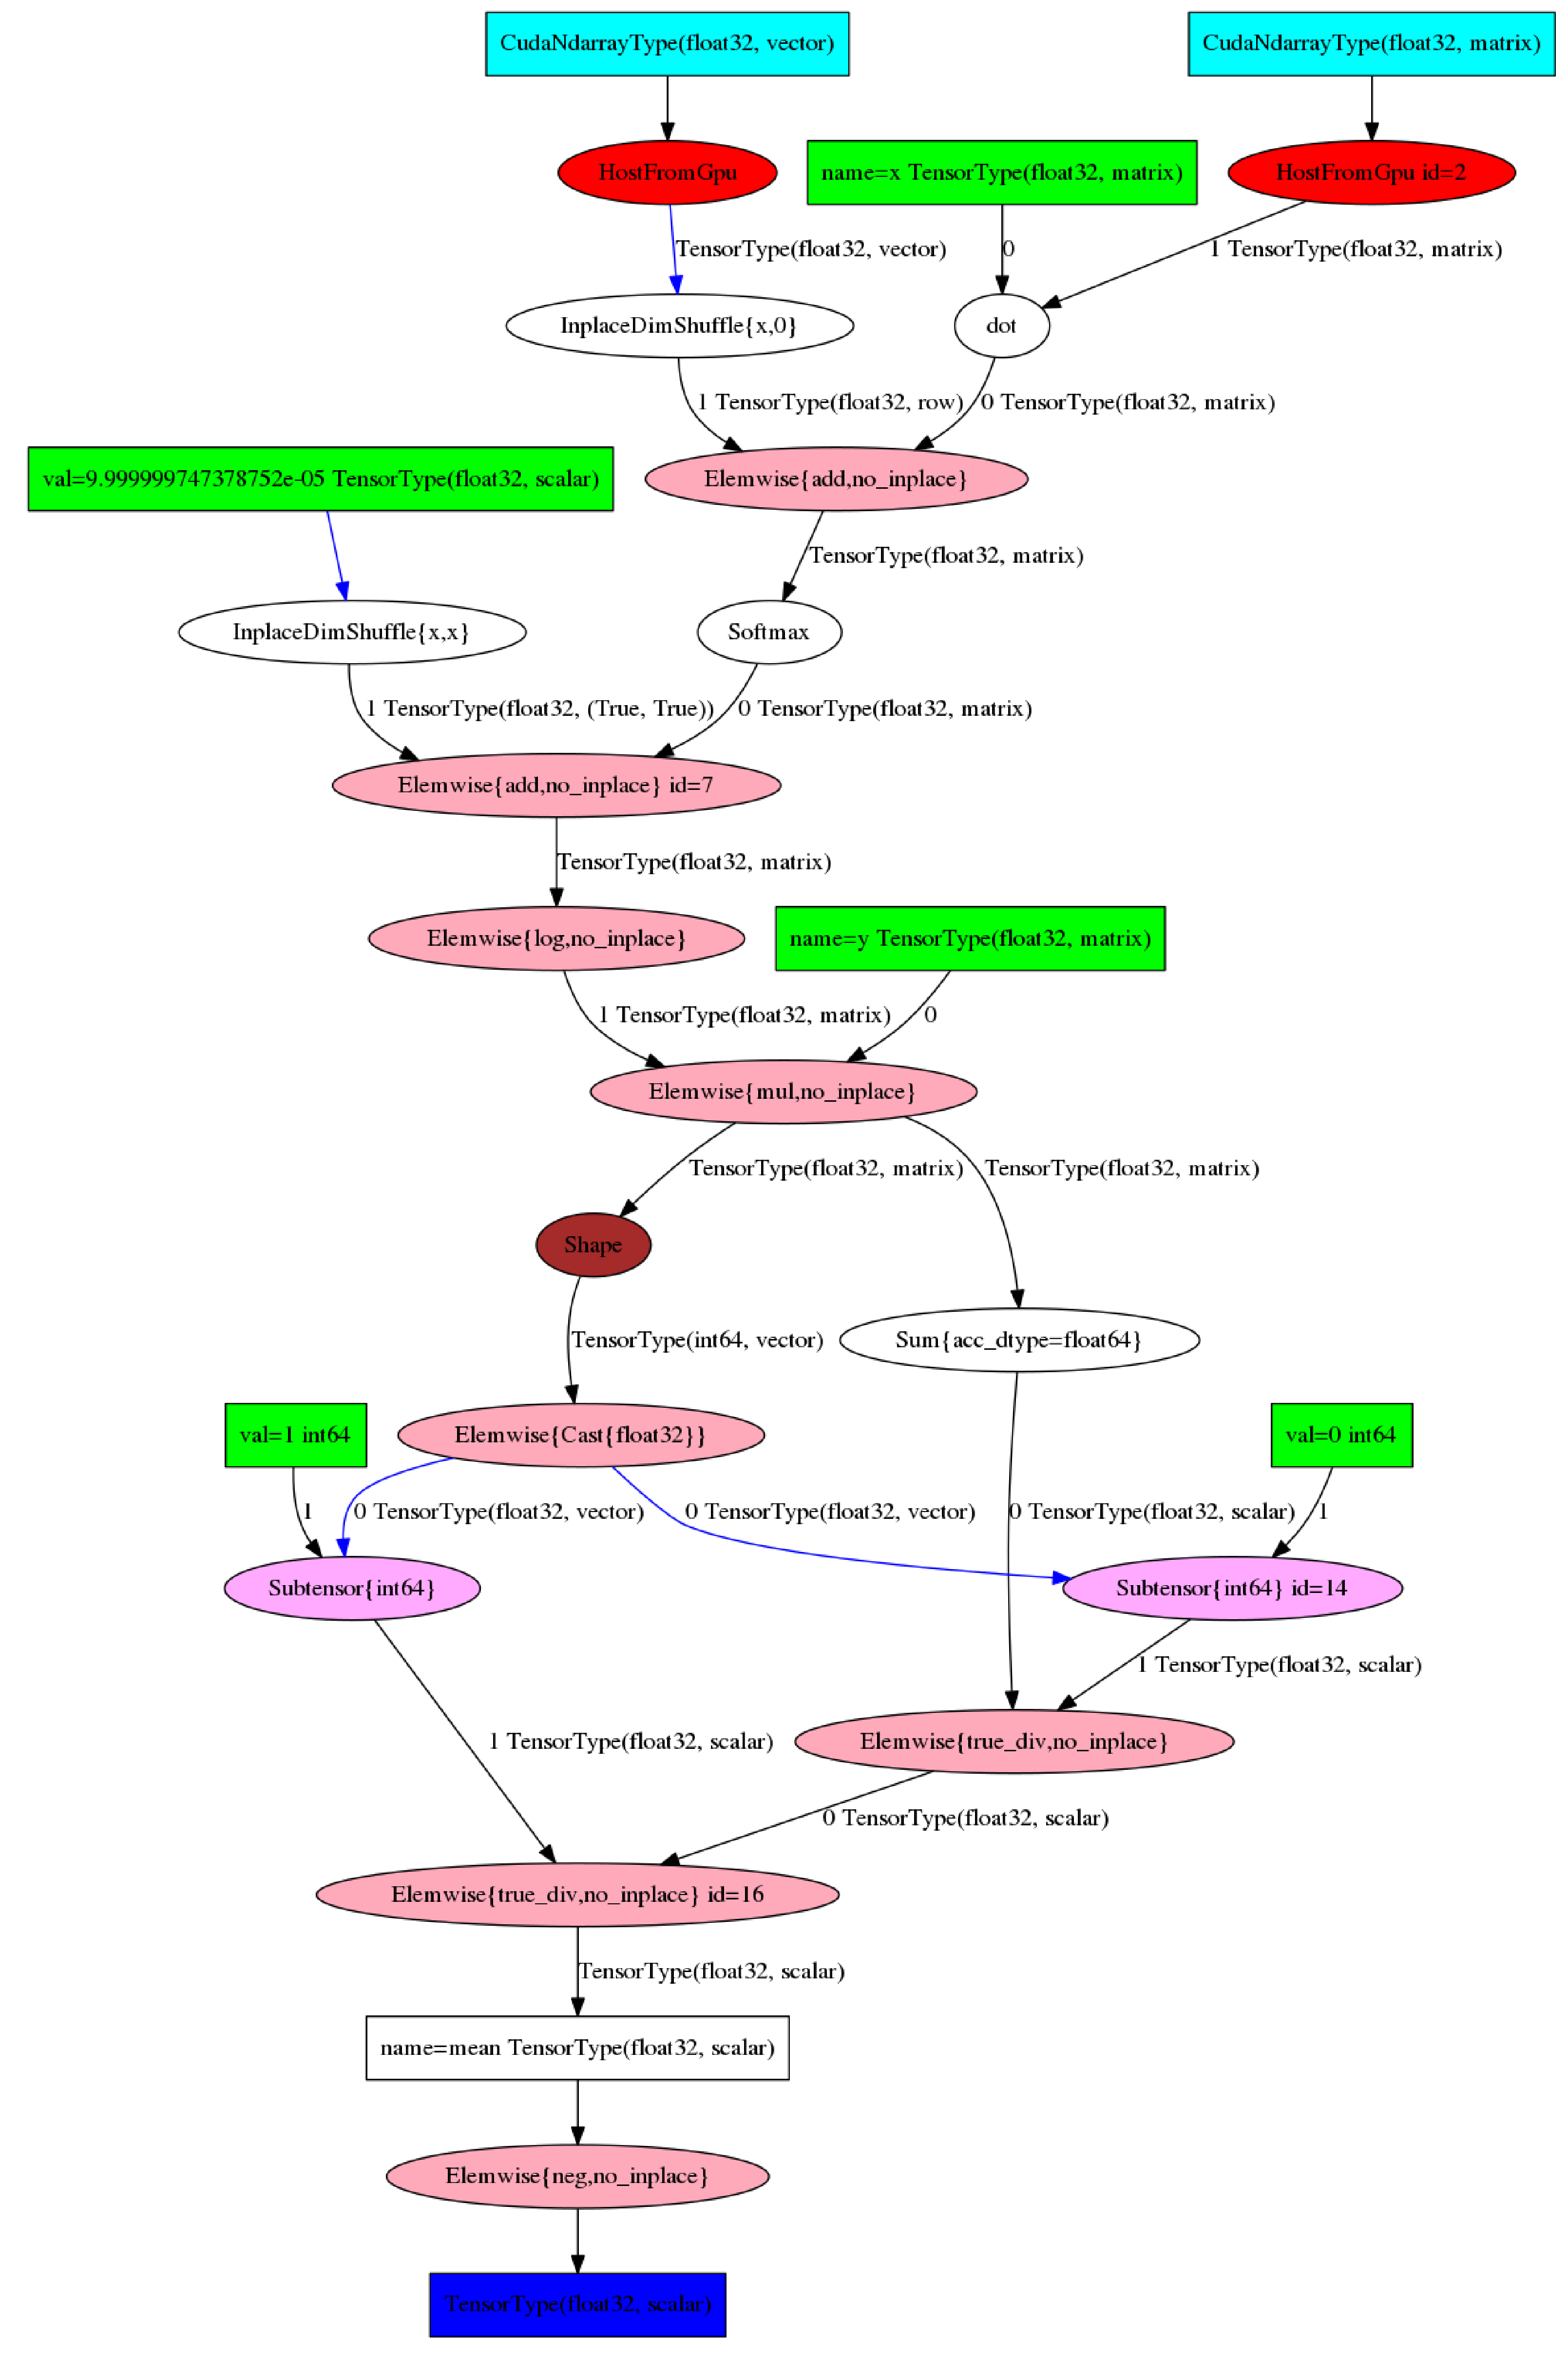

NameError: name 'x_arr' is not defined

In [3]:
o.view_graph()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    font = cv2.FONT_HERSHEY_PLAIN
        #文字の書き込み
 #   cv2.putText(im,text,(w-length-from_edge-5,h-from_edge-hight),font, font_size,(255,255,0))

#    cv2.imshow('frame',gray)
    img = cv2.putText(gray,"%s" %o.pred_func([cv2.resize(gray.astype(np.float32)/255, (28,28)).flatten()])[0][0], (100, 100), font, 10, (255,255,255)) 
    cv2.imshow('frame',img)
    #cv2.imshow("conv",cv2.resize(o.pred_func([cv2.resize(-gray, (28,28)).flatten()]).reshape((28,28)), (1000, 1000)))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [60]:
cv2.putText?

Docstring: putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
Type:      builtin_function_or_method


In [120]:
import cv2
img = cv2.resize(cv2.imread("/home/yu/Pictures/tori.jpg",0), (28,28))

In [170]:
#img = eye(28,28)
#img += img[::-1,:]
def num_img(i):
    imshow(o.pred_func([[i]]).reshape(28,28), "gray")
    show()


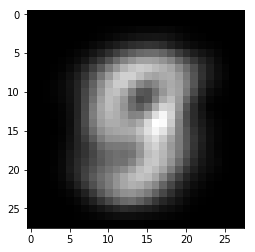

In [179]:
num_img(9)

In [151]:
o = o.opt_Adam(0.0001).compile()
o = o.optimize(10000,1)

/home/yu/jupyter/Optimizer_with_theano/src/Optimizer.py:418: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 3 is not part of the computational graph needed to compute the outputs: <TensorType(int64, scalar)>.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  on_unused_input='warn')


Epoch. 0: loss = 0.060051955749, acc = 0.0000e+00.
Epoch. 1: loss = 0.0600441112448, acc = 0.0000e+00.
Epoch. 2: loss = 0.060039477118, acc = 0.0000e+00.
Epoch. 3: loss = 0.0600354993483, acc = 0.0000e+00.
Epoch. 4: loss = 0.0600311222409, acc = 0.0000e+00.
Epoch. 5: loss = 0.0600268535482, acc = 0.0000e+00.
Epoch. 6: loss = 0.0600228663796, acc = 0.0000e+00.
Epoch. 7: loss = 0.0600189828038, acc = 0.0000e+00.
Epoch. 8: loss = 0.0600143937752, acc = 0.0000e+00.
Epoch. 9: loss = 0.0600100153668, acc = 0.0000e+00.
KeyboardInterrupt



In [9]:
[x.n_out for x in o.layerlst]

[(784,), (1, 28, 28), (1, 12, 12), (1, 2, 2), (1, 12, 12), (1, 28, 28), 784]

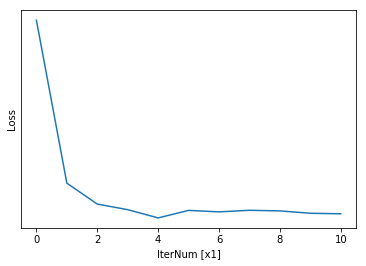

In [16]:
import Optimizer as op
o = op.optimizer(n_batch=128)
o = o.set_datasets("mnist", is_one_hot=True)
#o = o.reshape((n_batch,1,28,28)).conv2d(kshape=(4,1,24,24)).relu().pool()
o = o.reshape((1, 28, 28))
o = o.conv_and_pool(1, 6, 6)
o = o.conv_and_pool(1, 1, 1)
o = o.conv_and_pool(1, 6, 6)
o = o.conv_and_pool(1, 28, 28)
o = o.loss_mse
o = o.dense(10).softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.001).compile()
o.x_train_arr /= 255
o.y_train_arr = o.x_train_arr
o = o.optimize(10000000,1)

In [12]:
o.pred_func(o.x_train_arr[0:200]).argmax(axis=1) == o.y_train_arr[0:200].argmax(axis=1)

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [4]:
o.params[3].eval()

b'CudaNdarray([ 0.5668745])'

In [6]:
import numpy as np
np.zeros((3,))

array([ 0.,  0.,  0.])

/home/yu/jupyter/Optimizer_with_theano/src/Optimizer.py:385: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 3 is not part of the computational graph needed to compute the outputs: <TensorType(int64, scalar)>.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  on_unused_input='warn')
/home/yu/jupyter/Optimizer_with_theano/src/Optimizer.py:411: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 3 is not part of the computational graph needed to compute the outputs: <TensorType(int64, scalar)>.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  on_unused_input='warn')


Epoch. 0: loss = 0.0307335405657, acc = 0.0000e+00.
Epoch. 20: loss = 0.03050399191, acc = 0.0000e+00.
Epoch. 40: loss = 0.0304411095433, acc = 0.0000e+00.
Epoch. 60: loss = 0.0303739165445, acc = 0.0000e+00.
Epoch. 80: loss = 0.0303202772551, acc = 0.0000e+00.
Epoch. 100: loss = 0.0302626437077, acc = 0.0000e+00.
Epoch. 120: loss = 0.0302011437319, acc = 0.0000e+00.
Epoch. 140: loss = 0.0301448109208, acc = 0.0000e+00.
Epoch. 160: loss = 0.0300878812917, acc = 0.0000e+00.
Epoch. 180: loss = 0.0300355555665, acc = 0.0000e+00.
KeyboardInterrupt



In [5]:
o.loss_func(9)

array(2.3019604682922363, dtype=float32)

In [4]:
o.f(0)[0:10]

array([19476, 18313, 42214, 60712, 22249, 40571, 19037, 47421, 35138,  4973])

In [21]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# 画像データを入れる用のplaceholder
# 784は画像のピクセルの数
x = tf.placeholder(tf.float32, [None, 784])

# 正解データを入れる用のplaceholder
y = tf.placeholder(tf.float32, [None, 10])

# weightを用意
# 各ピクセルに対する0〜9までの数字に対するweightを入れるという意味で、784*10個用意
w = tf.Variable(tf.zeros([784, 10]))

# 式（x * w）
f = tf.matmul(x, w)

# テキトーなloss functionのようなナニカ
loss = tf.reduce_sum(tf.abs(y - f) * 0.1)

# 一番よく見かけるGradientDescentOptimizer（最急降下法）を使う
opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# valiableの初期化
sess = tf.Session()
sess.run(tf.initialize_all_variables())

# 学習開始
sess.run(opt, feed_dict={x: mnist.train.images, y: mnist.train.labels})

# 結果
weights = sess.run(w)

# 算出されたweightを描画してみる
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, 5)
for idx in range(10):
    ax = axarr[int(idx / 5)][idx % 5]
    ax.imshow(weights[:, idx].reshape(28, 28))#, cmap = cm.Greys_r)
    ax.set_title(str(idx))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.


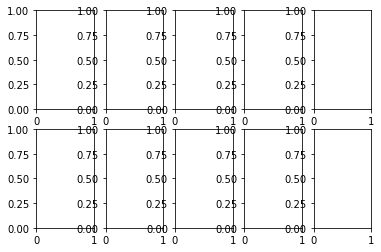

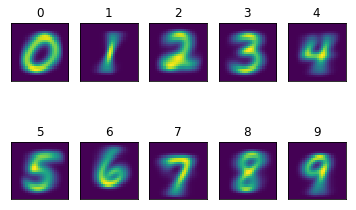

In [22]:
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# データ読み込み
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# placeholder用意
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# weightとbias
# さっきの例ではw * xだったけど、今回はw * x + b
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Softmax Regressionを使う
y = tf.nn.relu(tf.matmul(x, W) + b)

W = tf.Variable(tf.zeros([10, 10]))
b = tf.Variable(tf.zeros([10]))

# Softmax Regressionを使う
y = tf.nn.softmax(tf.matmul(y, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

# 先ほど使ったGradientDescentOptimizerで、今回はcross_entropyを利用
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# 初期化
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# 学習
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# テストデータで予測
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
  #=> 0.91839999

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.


0.1135

In [1]:
''''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='linear'))
model.add(Dense(num_classes, activation='linear'))
model.add(Dense(num_classes, activation='linear'))
model.add(Dense(num_classes, activation='linear'))
model.add(Dense(num_classes, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s - loss: 0.7798 - acc: 0.7565 - val_loss: 0.4505 - val_acc: 0.8678
Epoch 2/12
60000/60000 [==============================] - 3s - loss: 0.4126 - acc: 0.8814 - val_loss: 0.3688 - val_acc: 0.8950
Epoch 3/12
60000/60000 [==============================] - 3s - loss: 0.3681 - acc: 0.8979 - val_loss: 0.3508 - val_acc: 0.9017
Epoch 4/12
60000/60000 [==============================] - 3s - loss: 0.3516 - acc: 0.9020 - val_loss: 0.3482 - val_acc: 0.9026
Epoch 5/12
60000/60000 [==============================] - 2s - loss: 0.3417 - acc: 0.9052 - val_loss: 0.3389 - val_acc: 0.9075
Epoch 6/12
60000/60000 [==============================] - 3s - loss: 0.3334 - acc: 0.9081 - val_loss: 0.3328 - val_acc: 0.9068
Epoch 7/12
60000/60000 [==============================] - 3s - loss: 0.3266 - acc: 0.9096 - val_loss: 0.3312 - val_

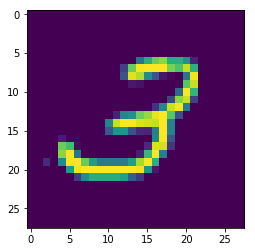

In [14]:
from pylab import *
%matplotlib inline
imshow(o.x_train_arr[0].reshape(28,28).astype(uint8))

In [5]:
keras.losses.categorical_crossentropy

Signature: keras.losses.categorical_crossentropy(y_true, y_pred)
Docstring: <no docstring>
File:      ~/anaconda3/lib/python3.5/site-packages/keras/losses.py
Type:      function


In [4]:
import theano as th
th.variable()

AttributeError: module 'theano' has no attribute 'variable'

In [5]:
th.Variable

theano.gof.graph.Variable

In [6]:
import theano as th

In [10]:
out_type = {1: "a", 2:"b", 3:"c"}
o = lambda ndim: out_type.get(ndim,"d")

In [9]:
o.out.reshape([-1, 3, 3])

Reshape{3}.0

In [12]:
x = th.tensor.dmatrix()

In [16]:
x.eval({x:np.zeros((3,3))})

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [15]:
o.opt_Adam?

In [47]:
import Optimizer as op

o = op.optimizer(n_batch=1000)
o = o.set_datasets("sin", is_one_hot=False)
#o.x_train_arr /= 255
#o1.y_train_arr = o1.x_train_arr
#o = op.optimizer(n_batch=10)
#o.set_data(o1.x_train_arr, o1.y_train_arr)
o.set_variables()
o = o.dense(10).softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
#o = o.optimize(10000000,1)



1 10


/home/yu/jupyter/Optimizer_with_theano/src/Optimizer.py:419: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 3 is not part of the computational graph needed to compute the outputs: <TensorType(int64, scalar)>.
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  on_unused_input='warn')


In [49]:
o.set_datasets

Signature: o.set_datasets(data='mnist', data_home='data_dir_for_optimizer', is_one_hot=True)
Source:   
    def set_datasets(self, data="mnist", data_home="data_dir_for_optimizer", is_one_hot=True):
        obj = self.copy()
        obj.set_data(*ds.set_datasets(data, data_home, is_one_hot))
        obj.set_variables()
        return obj
File:      ~/jupyter/Optimizer_with_theano/src/Optimizer.py
Type:      method


In [45]:
o.y_train_arr.shape

(900, 1)

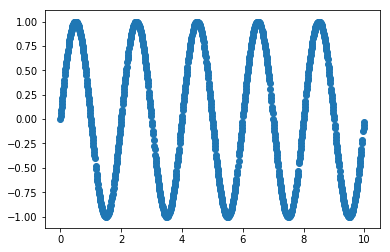

In [51]:
scatter(o.x_train_arr.flatten(), o.y_train_arr.flatten());show()